# 1. Problem Statement

## 1.1 Business understanding:

We work for a consumer finance company which specialises in lending various types of loans to urban customers.When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
Two types of risks are associated with the bank’s decision:
 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

There are two types of decisions that could be taken by the company for the applicants:
 1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
   1.1 Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
   1.2 Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
   1.3 Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
 2. Loan rejected: The company had rejected the loan because the candidate does not meet their requirements etc.

The given data contains information about past approved loan applicants and whether they ‘defaulted’ or not.

## 1.2 Objective:

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In the given dataset, the customers labelled as 'charged-off' are the 'defaulters'.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

# 2. Data loading and cleaning

In [137]:
# Import required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [138]:
# Load Data
loandf = pd.read_csv('loan.csv',low_memory=False)

In [139]:
#checking initial few records
pd.set_option('display.max_columns',150)
loandf.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [140]:
loandf.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

In [141]:
#check shape no of rows & columns
loandf.shape

(39717, 111)

In [142]:
#check columns with null values
print('no of rows :',len(loandf.index)) # To get no of rows
print('----------','no of null values in each columns','----------')
print(loandf.isnull().sum()) # To get no of null values in each columns
null_percentage = 100*round(loandf.isnull().sum()/len(loandf.index),2) # Find null value percentage in each columns
print('----------','null_percentage in each columns','----------')
print(null_percentage)

no of rows : 39717
---------- no of null values in each columns ----------
id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_

In [143]:
pd.set_option('display.max_rows',111)
null_percentage[null_percentage>0]

emp_title                           6.0
emp_length                          3.0
desc                               33.0
mths_since_last_delinq             65.0
mths_since_last_record             93.0
next_pymnt_d                       97.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0


### Observation : There are too many columns with 100% null values and few are above 30% null values,Columns with more than 30% null values can not contribute to our analysis so we can safly drop these columns.

In [144]:
len(null_percentage[null_percentage>30]) # No of columns being dropped

58

In [145]:
# Dropping all columns which have null values for all rows
loandf.drop(null_percentage[null_percentage>30].index,axis=1,inplace=True)
#total no of columns having all null values > 30% =58, hence after dropping all 58 columns no of columns should be 111-58=53
loandf.shape

(39717, 53)

In [146]:
loandf.head() #checking initial few records after dropping columns having null values >30%

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_p

In [147]:
loandf.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [148]:
#Analyze single valued columns
loandf[loandf.nunique()[loandf.nunique()==1].index]
#we can safly understand that these single valued data would not contribute to our analysis, hence we can drop them

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0              n                   f                         0.0            1   
1              n                   f                         0.0            1   
2              n                   f                         0.0            1   
3              n                   f                         0.0            1   
4              n                   f                         0.0            1   
...          ...                 ...                         ...          ...   
39712          n                   f                         NaN            1   
39713          n                   f                         NaN            1   
39714          n                   f                         NaN            1   
39715          n                   f                         NaN            1   
39716          n                   f                         NaN            1   

      application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0           INDIVIDUAL               0                       0.0            0   
1           INDIVIDUAL               0                       0.0            0   
2           INDIVIDUAL               0                       0.0            0   
3           INDIVIDUAL               0                       0.0            0   
4           INDIVIDUAL               0                       0.0            0   
...                ...             ...                       ...          ...   
39712       INDIVIDUAL               0                       NaN            0   
39713       INDIVIDUAL               0                       NaN            0   
39714       INDIVIDUAL               0                       NaN            0   
39715       INDIVIDUAL               0                       NaN            0   
39716       INDIVIDUAL               0                       NaN            0   

       tax_liens  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
39712        NaN  
39713        NaN  
39714        NaN  
39715        NaN  
39716        NaN  

[39717 rows x 9 columns]

In [149]:
#dropping single valued columns, 
loandf.drop(loandf.nunique()[loandf.nunique()==1].index,axis=1,inplace=True)

In [150]:
loandf.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
4  https://lendingclub.com/browse/loanDetail.acti...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9       0.00           0.00   5863.155187          5833.84   
1          4       0.00           0.00   1008.710000          1008.71   
2         10       0.00           0.00   3005.666844          3005.67   
3         37       0.00           0.00  12231.890000         12231.89   
4         38     524.06         524.06   3513.330000          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          2475.94        1037.39                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   
3                     0.00       Jan-15           357.48             Apr-16   
4                     0.00       May-16            67.79   

In [151]:
loandf.shape

(39717, 44)

### Observations :There are many customer behaviour variable columns or post loan variables which are not available at the time of loan application, so these can not be used as analysis at the time of loan application. We can safly remove these columns.

#### Thease columns are : 
- delinq_2yrs
- earliest_cr_line
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- revol_util
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d


In [152]:
#Dropping post loan variables
loandf.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d'],
        axis=1,inplace=True)

In [153]:
print(loandf.shape) # shape after dropping post loan variables
loandf.head() #analysing few records after dropping post loan variables

(39717, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
4  https://lendingclub.com/browse/loanDetail.acti...           other   

                  title zip_code addr_state    dti revol_util  \
0              Computer    860xx         AZ  27.65     83.70%   
1                  bike    309xx         GA   1.00      9.40%   
2  real estate business    606xx         IL   8.72     98.50%   
3              personel    917xx         CA  20.00        21%   
4              Personal    972xx         OR  17.94     53.90%   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [154]:
#Analyzing unique values for the remaining columns to get understanding categorical & contiious variables in terms of unique values 
loandf.nunique().sort_values(ascending=False)

id                      39717
member_id               39717
url                     39717
emp_title               28820
title                   19615
installment             15383
funded_amnt_inv          8205
annual_inc               5318
dti                      2868
revol_util               1089
funded_amnt              1041
loan_amnt                 885
zip_code                  823
int_rate                  371
issue_d                    55
addr_state                 50
sub_grade                  35
purpose                    14
emp_length                 11
grade                       7
home_ownership              5
loan_status                 3
verification_status         3
pub_rec_bankruptcies        3
term                        2
dtype: int64

In [155]:
#Analysing title & emp_title data to understand if it may contribute in our analysis
loandf[['title','emp_title']]

title                   emp_title
0                       Computer                         NaN
1                           bike                       Ryder
2           real estate business                         NaN
3                       personel         AIR RESOURCES BOARD
4                       Personal    University Medical Group
...                          ...                         ...
39712           Home Improvement             FiSite Research
39713  Retiring credit card debt  Squarewave Solutions, Ltd.
39714     MBA Loan Consolidation                         NaN
39715                   JAL Loan                         NaN
39716         Consolidation Loan            Evergreen Center

[39717 rows x 2 columns]

### Observations:
- id,member_id,url have all unique values and also does not contribute to defaulting loans at all so we can remove them, however for having primary key keeping id column.
- title, emp_title, zip_code,addr_state having text values (categorical variable) with too high unique values and does not contribute in our analysis so we can remove them.

In [156]:
# dropping member_id,url,title,emp_title columns after understanding from above observations
loandf.drop(['member_id','url','title','emp_title','zip_code'],axis=1,inplace=True)

In [157]:
print(loandf.shape)
loandf.head()

(39717, 20)


id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
4     Source Verified  Dec-11      Current           other         OR  17.94   

  revol_util  pub_rec_bankruptcies  
0     83.70%                   0.0  
1      9.40%                   0.0  
2     98.50%                   0.0  
3        21%                   0.0  
4     53.90%                   0.0

In [158]:
loandf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'revol_util', 'pub_rec_bankruptcies'],
      dtype='object')

In [159]:
print(loandf.shape)
loandf.loan_status.value_counts()

(39717, 20)


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Observations:
- As per data understanding there are 3 different loan status
- Since we are analyzing loklyhood of defaulting loan at the time of application, Ongoing loans can will not contribute in our analysis.
- So we need to filter out rows with loan_status='Current'

In [160]:
# Removing rows with loan_status='Current'
loandf=loandf[loandf.loan_status!='Current']

In [161]:
# after removing rows shape
print(loandf.shape)
loandf.loan_status.value_counts()

(38577, 20)


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Analyzing missing values

In [162]:
#analyze missing values in percentage
loandf_null_per=loandf.isnull().sum()/len(loandf.index)*100
loandf_null_per[loandf_null_per>0]

emp_length              2.677761
revol_util              0.129611
pub_rec_bankruptcies    1.806776
dtype: float64

In [163]:
# checking data types of emp_length,revol_util & pub_rec_bankruptcies
loandf[['emp_length','revol_util','pub_rec_bankruptcies']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   emp_length            37544 non-null  object 
 1   revol_util            38527 non-null  object 
 2   pub_rec_bankruptcies  37880 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [164]:
#analyzing emp_length column for data imputation
print(loandf.emp_length.value_counts())
print('mode of emp_length variable : ',loandf.emp_length.mode()[0])

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
mode of emp_length variable :  10+ years


###  Imputing missing values
- Since emp_length is with less unique values and it is categorical variable we should fill missing values with mode. '10+ year' value has quite heigher frequency than 2nd higher value '< 1 year'
- Since revol_util is having very low percentage of missing values, we may remove these rows.
- Since pub_rec_bankruptcies is having no of unique values only 3, we may consider it categorical values and impute it woth mode

In [165]:
#Filling missing value in emp_length with mode
loandf.emp_length.fillna(loandf.emp_length.mode()[0],inplace=True)
# after imputing missing value in emp_length verifying missing percentage
loandf.emp_length.isnull().sum()

0

In [166]:
# Removing missing values rows for revol_util
loandf.dropna(axis=0,subset=['revol_util'], inplace=True)
# after dropping missing value in revol_util verifying missing percentage
loandf.revol_util.isnull().sum()

0

In [167]:
print('no of unique values : ',loandf.pub_rec_bankruptcies.nunique()) # checking no of unique values
print(loandf.pub_rec_bankruptcies.value_counts()) # checking value counts
# Since no of unique values are only 3 we may consider it categorical values and impute it woth mode
print('mode of pub_rec_bankruptcies : ',loandf.pub_rec_bankruptcies.mode()[0]) # evaluating mode

#Filling missing value in pub_rec_bankruptcies with mode
loandf.pub_rec_bankruptcies.fillna(loandf.pub_rec_bankruptcies.mode()[0],inplace=True)
# after imputing missing value in emp_length verifying missing percentage
loandf.pub_rec_bankruptcies.isnull().sum()

no of unique values :  3
0.0    36189
1.0     1636
2.0        5
Name: pub_rec_bankruptcies, dtype: int64
mode of pub_rec_bankruptcies :  0.0


0

In [168]:
#validating missing values
loandf.isnull().sum()/len(loandf.index)*100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
revol_util              0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [169]:
loandf.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
5  1075269       5000         5000           5000.0   36 months    7.90%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
5       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

  revol_util  pub_rec_bankruptcies  
0     83.70%                   0.0  
1      9.40%                   0.0  
2     98.50%                   0.0  
3        21%                   0.0  
5     28.30%                   0.0

## Standardizing data
- seperation of continious and categorical variables.
- term column have space at the begining so removed that.
- emp_length data standardized with 10+ yeares to 10 and <1 years to 0 and also removed year word with data typecasting to Integer.
- Issue_d column have data in month and year so derived new columns issue_month and issue_year to have numeric data type.
- revol_util & int-rate have % sign in the data so removed them and converted to integer
- rest of the data are fine for our analysis.

In [170]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38527 non-null  int64  
 1   loan_amnt             38527 non-null  int64  
 2   funded_amnt           38527 non-null  int64  
 3   funded_amnt_inv       38527 non-null  float64
 4   term                  38527 non-null  object 
 5   int_rate              38527 non-null  object 
 6   installment           38527 non-null  float64
 7   grade                 38527 non-null  object 
 8   sub_grade             38527 non-null  object 
 9   emp_length            38527 non-null  object 
 10  home_ownership        38527 non-null  object 
 11  annual_inc            38527 non-null  float64
 12  verification_status   38527 non-null  object 
 13  issue_d               38527 non-null  object 
 14  loan_status           38527 non-null  object 
 15  purpose            

In [171]:
loandf.nunique()

id                      38527
loan_amnt                 869
funded_amnt              1018
funded_amnt_inv          8040
term                        2
int_rate                  370
installment             15002
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5210
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
addr_state                 50
dti                      2853
revol_util               1088
pub_rec_bankruptcies        3
dtype: int64

In [172]:
# separating variable types
loandf_cont_col=['id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','revol_util']
loandf_cat_col=['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','addr_state','pub_rec_bankruptcies']
loandf.shape[1]==len(loandf_cont_col)+len(loandf_cat_col) # validating all columns counted

True

In [173]:
loandf[loandf_cat_col].head()

term grade sub_grade emp_length home_ownership verification_status  \
0   36 months     B        B2  10+ years           RENT            Verified   
1   60 months     C        C4   < 1 year           RENT     Source Verified   
2   36 months     C        C5  10+ years           RENT        Not Verified   
3   36 months     C        C1  10+ years           RENT     Source Verified   
5   36 months     A        A4    3 years           RENT     Source Verified   

  issue_d  loan_status         purpose addr_state  pub_rec_bankruptcies  
0  Dec-11   Fully Paid     credit_card         AZ                   0.0  
1  Dec-11  Charged Off             car         GA                   0.0  
2  Dec-11   Fully Paid  small_business         IL                   0.0  
3  Dec-11   Fully Paid           other         CA                   0.0  
5  Dec-11   Fully Paid         wedding         AZ                   0.0

In [174]:
#term has only two unique values
print(loandf.term.unique()) # values in term seems to have space at the begining, so lets remove them

[' 36 months' ' 60 months']


In [175]:
loandf.term=loandf.term.str.strip() # removing space from begining in term column
loandf.term.unique() # checking values after removing space

array(['36 months', '60 months'], dtype=object)

In [176]:
loandf.grade.unique() # data is fine

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [177]:
loandf.sub_grade.unique()# data is fine

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [178]:
loandf.emp_length.unique()
# We can keep only integer data in this column by manupulating '10+ years' to 10 and '< 1 year' to 0 and removing year word
loandf.emp_length=loandf.emp_length.apply(lambda x: 0 if "<" in x else (x.split("+")[0] if "+" in x else x.split()[0])).astype('int')
loandf.emp_length.unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7])

In [179]:
loandf.home_ownership.unique()
# We can there these is value as NONE which is not valid and we can replace it with mode

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [180]:
print(loandf.home_ownership.mode()) # finding mode
#replacing NONE value with mode
loandf.home_ownership=np.where(loandf.home_ownership=='NONE',loandf.home_ownership.mode(),loandf.home_ownership)

0    RENT
Name: home_ownership, dtype: object


In [181]:
loandf.verification_status.unique()# data is fine

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [182]:
loandf.issue_d.unique()
# For now we are leaving it as it is, however we may need to derive month and year column out of issue_d column 

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [183]:
#Creating derived variables for issue_d column in month and year
loandf['issue_month']=pd.to_datetime(loandf.issue_d,format='%b-%y').dt.month
loandf['issue_year']=pd.to_datetime(loandf.issue_d,format='%b-%y').dt.year

In [184]:
print(loandf[['issue_month','issue_year']].nunique()) # no of unique values
# we can say there are two more categorical variable to be added
loandf_cat_col.append('issue_month')
loandf_cat_col.append('issue_year')

issue_month    12
issue_year      5
dtype: int64


In [185]:
loandf.loan_status.unique() # data is fine

array(['Fully Paid', 'Charged Off'], dtype=object)

In [186]:
loandf.purpose.unique() # data is fine

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [187]:
loandf.addr_state.unique() # data is fine

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [188]:
loandf.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [189]:
loandf[loandf_cont_col].head()

id  loan_amnt  funded_amnt  funded_amnt_inv int_rate  installment  \
0  1077501       5000         5000           4975.0   10.65%       162.87   
1  1077430       2500         2500           2500.0   15.27%        59.83   
2  1077175       2400         2400           2400.0   15.96%        84.33   
3  1076863      10000        10000          10000.0   13.49%       339.31   
5  1075269       5000         5000           5000.0    7.90%       156.46   

   annual_inc    dti revol_util  
0     24000.0  27.65     83.70%  
1     30000.0   1.00      9.40%  
2     12252.0   8.72     98.50%  
3     49200.0  20.00        21%  
5     36000.0  11.20     28.30%

In [190]:
#revol_util & int_rate is having % sign so lets remove it and also changing revol_util type to appropriate float
loandf.revol_util=loandf.revol_util.apply(lambda x:x.split('%')[0]).astype('float')
loandf.int_rate=loandf.int_rate.apply(lambda x:x.split('%')[0]).astype('float')

In [191]:
loandf[loandf_cont_col].head()

id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
0  1077501       5000         5000           4975.0     10.65       162.87   
1  1077430       2500         2500           2500.0     15.27        59.83   
2  1077175       2400         2400           2400.0     15.96        84.33   
3  1076863      10000        10000          10000.0     13.49       339.31   
5  1075269       5000         5000           5000.0      7.90       156.46   

   annual_inc    dti  revol_util  
0     24000.0  27.65        83.7  
1     30000.0   1.00         9.4  
2     12252.0   8.72        98.5  
3     49200.0  20.00        21.0  
5     36000.0  11.20        28.3

# 3. Univariate Analysis

#### Numerical or continuous - Histogram, density plot, box plot
#### Categorical - Count plot, pie chart

## Continious variables

In [192]:
loandf[loandf_cont_col].dtypes

id                   int64
loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
int_rate           float64
installment        float64
annual_inc         float64
dti                float64
revol_util         float64
dtype: object

## Loan Amount : loan_amnt column
#### The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

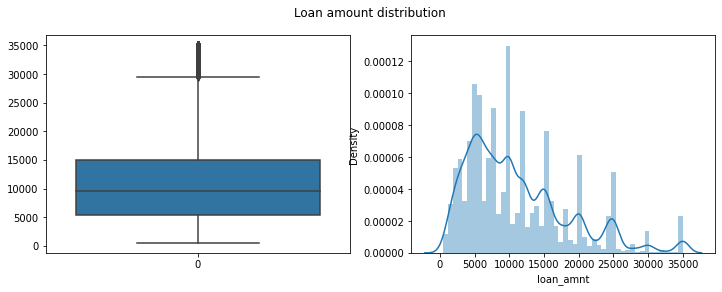

In [193]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Loan amount distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.loan_amnt) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.loan_amnt) # distribution plot
plt.show()

In [194]:
loandf.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
5%        2400.000000
10%       3125.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Loan amount Observations:
- Most of the people took loan of 10000
- Average loan amount is 11055
- very less percentage of people took loan of more than 30000
- we are not treating the outliers as there may be possibility very high loan amount can be factor of being default.


## Funded amount : funded_amnt
#### The total amount committed by investors for that loan at that point in time.

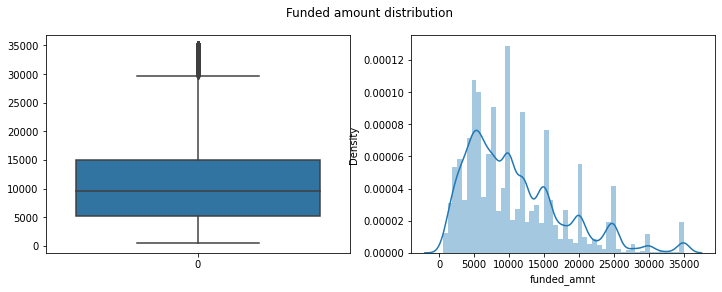

In [195]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Funded amount distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.funded_amnt) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.funded_amnt) # distribution plot
plt.show()

In [196]:
loandf.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]) # checking numeric value of metrics

count    38527.000000
mean     10791.956939
std       7090.256225
min        500.000000
5%        2400.000000
10%       3075.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

### Funded amount Observations:
- Mostly funded amount is of 10000
- Average loan amount is 10791
- very less percentage funded amount is more than 30000
- This shows Funded amount behaviour is similar to loan amount and it tells us that most of the funded amount is same as loan amount requested in the application.

## Funded amount invested : funded_amnt_inv
#### The total amount committed by investors for that loan at that point in time.

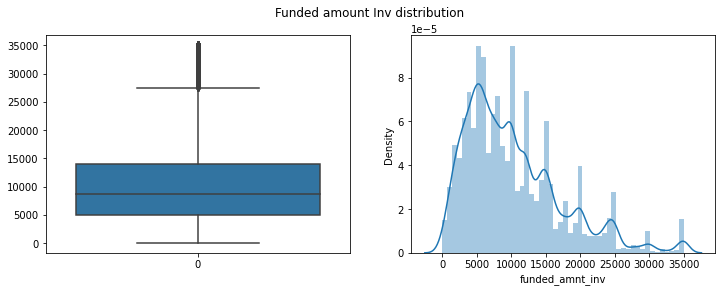

In [197]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Funded amount Inv distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.funded_amnt_inv) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.funded_amnt_inv) # distribution plot
plt.show()

In [198]:
loandf.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean     10230.940095
std       7022.678989
min          0.000000
5%        1800.000000
10%       2850.000000
25%       5000.000000
50%       8750.000000
75%      14000.000000
90%      19975.000000
95%      24506.582238
99%      34721.583150
max      35000.000000
Name: funded_amnt_inv, dtype: float64

## Funded amount Invested Observations:
- Investors are mostly intrested in funding between 3000 to 12000
- Average amount investor likly to fund is 10230
- very less percentage of investors are ready to fund more then 15000 amount
- This shows investors intrest in funding the loan amount is upto soewhere 15000 byond that, investor may feel risk to fund.

## Interest Rate : int_rate
#### Interest Rate on the loan.

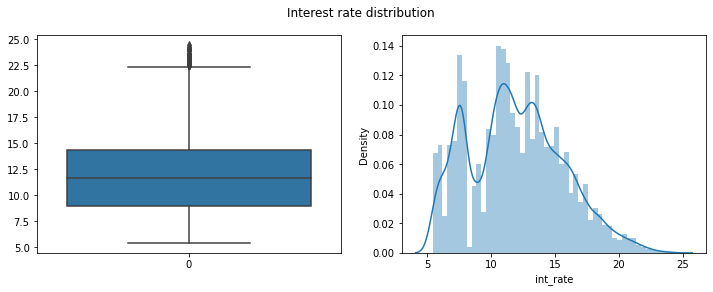

In [199]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Interest rate distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.int_rate) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.int_rate) # distribution plot
plt.show()

In [200]:
loandf.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
5%           6.170000
10%          7.140000
25%          8.940000
50%         11.710000
75%         14.350000
90%         16.820000
95%         18.300000
99%         20.900000
max         24.400000
Name: int_rate, dtype: float64

## Interest rate Observations:
- Average interest rate is 11.9
- Most of the people took loan on interest rate between 9-14 %
- Few people took loan at more than 20 % also.

## Installment  : installment
#### The monthly payment owed by the borrower if the loan originates.

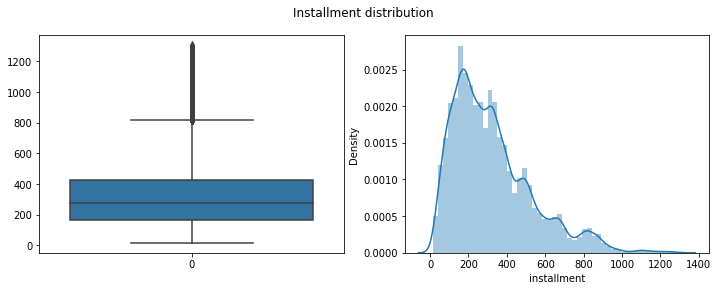

In [201]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Installment distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.installment) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.installment) # distribution plot
plt.show()

In [202]:
loandf.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean       322.678650
std        208.649278
min         15.690000
5%          70.924000
10%         99.230000
25%        165.740000
50%        278.150000
75%        425.860000
90%        621.222000
95%        760.820000
99%        931.090000
max       1305.190000
Name: installment, dtype: float64

## Installment Observations:
- Average installment amount is 322
- Most of the people are paying installement between 100-300
- Few people paying installment over 1000 also.

## Annual income  : annual_inc
#### The self-reported annual income provided by the borrower during registration.

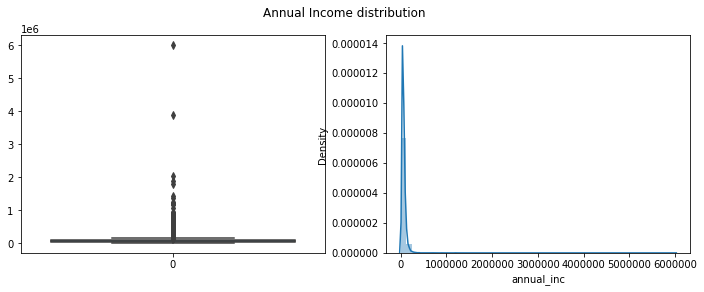

In [203]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Annual Income distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.annual_inc) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.annual_inc) # distribution plot

plt.ticklabel_format(style='plain')
plt.show()

In [204]:
loandf.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).apply(lambda x: format(x,'f'))

count      38527.000000
mean       68809.228611
std        64214.926394
min         4000.000000
5%         24000.000000
10%        30000.000000
25%        40000.000000
50%        59000.000000
75%        82000.000000
90%       115000.000000
95%       140004.000000
99%       234000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [205]:
#Due to very high annual income of outliares annual income analysis is dificult and so outlier treatment is required
loandf_ol_treated=loandf[loandf.annual_inc<=loandf.annual_inc.quantile(0.95)]

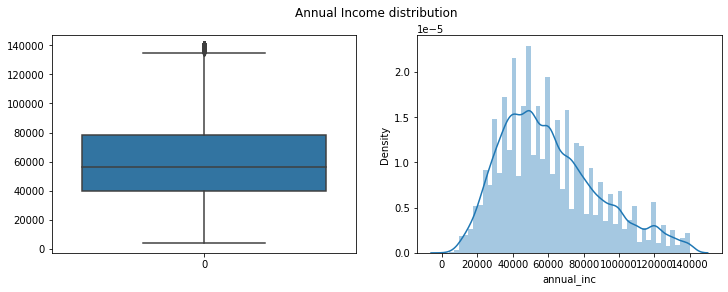

In [206]:
#Now lets plot the analysis chart
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Annual Income distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf_ol_treated.annual_inc) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf_ol_treated.annual_inc) # distribution plot
plt.show()

In [207]:
#creating income group through binning in the outlier treated dataframe
loandf_ol_treated['annual_inc_grp']=pd.cut(loandf_ol_treated.annual_inc,bins=5,labels=['4k-31k', '31k-58k','58k-85k','85k-112k', '112-140k'])

<AxesSubplot:xlabel='annual_inc_grp', ylabel='count'>

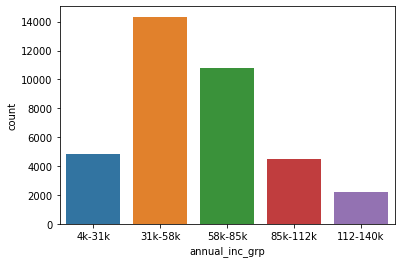

In [208]:
# count analysis anual income range wise
sns.countplot(loandf_ol_treated.annual_inc_grp)

<AxesSubplot:xlabel='annual_inc_grp', ylabel='count'>

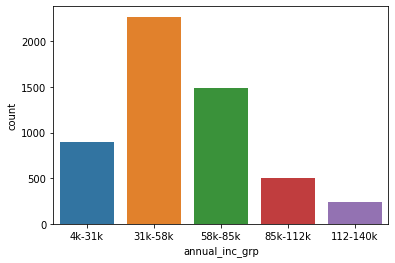

In [209]:
# cunt analysis anual income range wise only for loan status='Charged Off'
sns.countplot(loandf_ol_treated.annual_inc_grp[loandf_ol_treated.loan_status=='Charged Off'])

## Annual Income Observations:
- Average annual income is 68809
- Almost 99% of people have income below 234000 and only 1% is above 234000 which goes to maximum of 6000000
- After outlier treatment we can clearly say that income range mostly falls between 31000-58000
- We can also say that most of the defaults are done by the annual income group of 31000-58000

## DTI  : dti
### A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

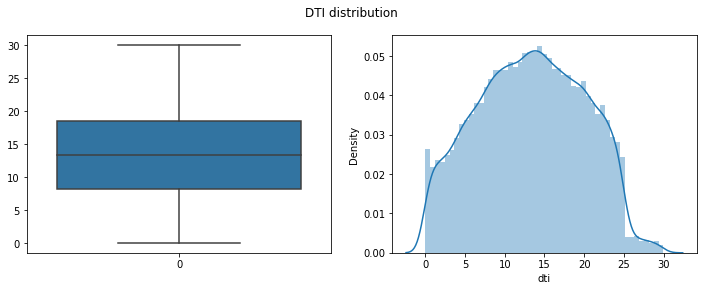

In [210]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('DTI distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.dti) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.dti) # distribution plot
plt.show()

In [211]:
loandf.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean        13.276353
std          6.671392
min          0.000000
5%           2.110000
10%          4.060000
25%          8.140000
50%         13.370000
75%         18.560000
90%         22.290000
95%         23.800000
99%         26.530000
max         29.990000
Name: dti, dtype: float64

## DTI Observations:
- average debt to income ratio of the applicant is 13.2
- All the loan has been given to borrowe who has debt to income ratio less than 30, which is good decision taken by the lending club.

## Borrower Credit utilization  : revol_util
### Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

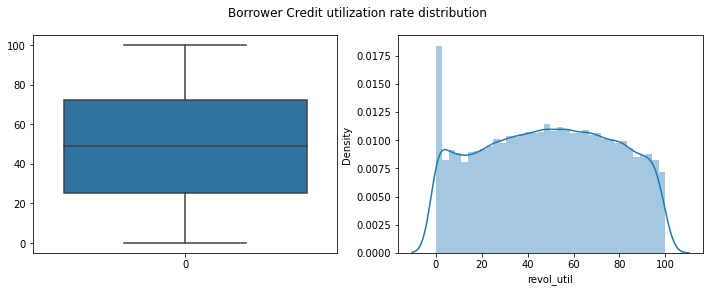

In [212]:
plt.figure(figsize=(12,4)) # setting figure size
plt.suptitle('Borrower Credit utilization rate distribution') # setting title
plt.subplot(1,2,1) # subplot 1
sns.boxplot(data=loandf.revol_util) # boxplot
plt.subplot(1,2,2) # subplot 2
sns.distplot(a=loandf.revol_util) # distribution plot
plt.show()

In [213]:
loandf.revol_util.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
5%           2.600000
10%          8.400000
25%         25.200000
50%         49.100000
75%         72.300000
90%         87.800000
95%         93.570000
99%         98.500000
max         99.900000
Name: revol_util, dtype: float64

## Borrower Credit utilization Observations:
- average credit utilization rate of applicant is 48.7%

## Categorical variables

In [214]:
loandf[loandf_cat_col].dtypes

term                     object
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
pub_rec_bankruptcies    float64
issue_month               int64
issue_year                int64
dtype: object

### Plotting count charts for all the categorical variables and analyze one by one

In [215]:
loandf[loandf_cat_col].dtypes

term                     object
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
pub_rec_bankruptcies    float64
issue_month               int64
issue_year                int64
dtype: object

In [216]:
loandf[loandf_cat_col].head()

term grade sub_grade  emp_length home_ownership verification_status  \
0  36 months     B        B2          10           RENT            Verified   
1  60 months     C        C4           0           RENT     Source Verified   
2  36 months     C        C5          10           RENT        Not Verified   
3  36 months     C        C1          10           RENT     Source Verified   
5  36 months     A        A4           3           RENT     Source Verified   

  issue_d  loan_status         purpose addr_state  pub_rec_bankruptcies  \
0  Dec-11   Fully Paid     credit_card         AZ                   0.0   
1  Dec-11  Charged Off             car         GA                   0.0   
2  Dec-11   Fully Paid  small_business         IL                   0.0   
3  Dec-11   Fully Paid           other         CA                   0.0   
5  Dec-11   Fully Paid         wedding         AZ                   0.0   

   issue_month  issue_year  
0           12        2011  
1           12        2011  
2           12        2011  
3           12        2011  
5           12        2011

In [217]:
print(loandf[loandf_cat_col].nunique())
#Since issue_d is not in appripriate format in can not contribute to our analysis and so that 
#we have created a derived columns issue_month & issue_year
#hence we can eliminate issue_d from our categorical column list

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           4
verification_status      3
issue_d                 55
loan_status              2
purpose                 14
addr_state              50
pub_rec_bankruptcies     3
issue_month             12
issue_year               5
dtype: int64


In [218]:
loandf_cat_col.remove('issue_d') # removing issue_d column from list

In [219]:
loandf_cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'pub_rec_bankruptcies',
 'issue_month',
 'issue_year']

In [220]:
# generating % data for values of all categorical variables
for i in range(len(loandf_cat_col)):
    print('---------',loandf_cat_col[i],'---------')
    print(loandf[loandf_cat_col[i]].value_counts(normalize=True).sort_values(ascending=False))

--------- term ---------
36 months    0.753991
60 months    0.246009
Name: term, dtype: float64
--------- grade ---------
B    0.303008
A    0.260726
C    0.202975
D    0.131570
E    0.068835
F    0.025177
G    0.007709
Name: grade, dtype: float64
--------- sub_grade ---------
A4    0.074571
B3    0.073325
A5    0.070470
B5    0.067874
B4    0.063228
C1    0.053287
B2    0.051938
C2    0.049991
A3    0.046980
B1    0.046643
A2    0.039141
C3    0.038570
D2    0.033301
C4    0.031277
C5    0.029849
A1    0.029564
D3    0.028863
D1    0.024035
D4    0.023776
D5    0.021595
E1    0.018740
E2    0.015859
E3    0.013315
E4    0.011005
E5    0.009915
F1    0.007891
F2    0.005996
F3    0.004516
F4    0.003841
F5    0.002933
G1    0.002414
G2    0.001973
G4    0.001402
G3    0.001168
G5    0.000753
Name: sub_grade, dtype: float64
--------- emp_length ---------
10    0.247022
0     0.116697
2     0.111247
3     0.104031
4     0.086563
5     0.082799
1     0.082098
6     0.056194
7     0.044333

#### count distribution analysis for categorical variables on entire data

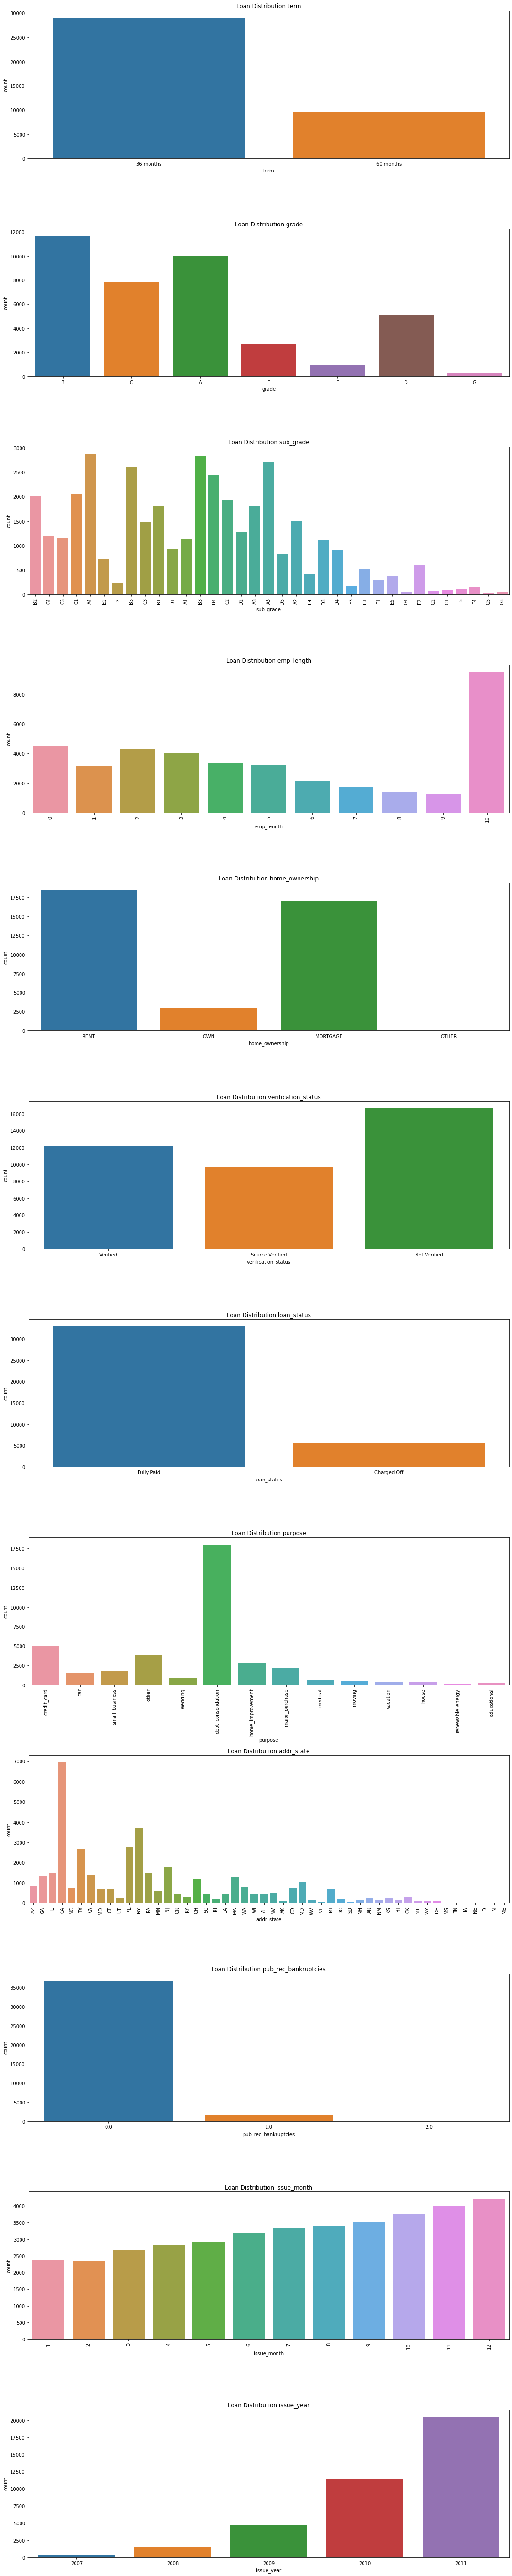

In [221]:
#plt.figure(figsize=(10,25)) # setting figure size
plt.figure(figsize=(15,75)) # setting figure size
for i in range(len(loandf_cat_col)):
    #plt.subplot(7,2,i+1)  # to take consolidated screenshot for PPT
    plt.subplot(len(loandf_cat_col),1,i+1)
    sns.countplot(x=loandf[loandf_cat_col[i]],data=loandf) # boxplot
    if loandf[loandf_cat_col[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.title('Loan Distribution '+loandf_cat_col[i])
    plt.tight_layout()
    

### Lets analyze few continious variables in groups as derived variable to see if it gives any insight

In [222]:
# Finding range of below variables
print('installment min:',loandf.installment.min())
print('installment max:',loandf.installment.max())
print('funded_amnt_inv min:',loandf.funded_amnt_inv.min())
print('funded_amnt_inv max:',loandf.funded_amnt_inv.max())
print('dti min:',loandf.dti.min())
print('dti max:',loandf.dti.max())

installment min: 15.69
installment max: 1305.19
funded_amnt_inv min: 0.0
funded_amnt_inv max: 35000.0
dti min: 0.0
dti max: 29.99


In [223]:
# creating derived variables by creating bins for column installment,funded_amnt_inv & dti for range analysis
loandf['installment_range']=pd.cut(loandf.installment,bins=10,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loandf['funded_amt_inv_range']=pd.cut(loandf.funded_amnt_inv,bins=7,labels=['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k'])
loandf['dti_range']=pd.cut(loandf.dti,bins=5,labels=['0-6','6-12','12-18','18-24','24-30'])

In [224]:
loandf.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000           4975.0  36 months     10.65   
1  1077430       2500         2500           2500.0  60 months     15.27   
2  1077175       2400         2400           2400.0  36 months     15.96   
3  1076863      10000        10000          10000.0  36 months     13.49   
5  1075269       5000         5000           5000.0  36 months      7.90   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2          10           RENT     24000.0   
1        59.83     C        C4           0           RENT     30000.0   
2        84.33     C        C5          10           RENT     12252.0   
3       339.31     C        C1          10           RENT     49200.0   
5       156.46     A        A4           3           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   revol_util  pub_rec_bankruptcies  issue_month  issue_year  \
0        83.7                   0.0           12        2011   
1         9.4                   0.0           12        2011   
2        98.5                   0.0           12        2011   
3        21.0                   0.0           12        2011   
5        28.3                   0.0           12        2011   

  installment_range funded_amt_inv_range dti_range  
0           145-274                 0-5k     24-30  
1            14-145                 0-5k       0-6  
2            14-145                 0-5k      6-12  
3           274-403                5-10k     18-24  
5           145-274                 0-5k      6-12

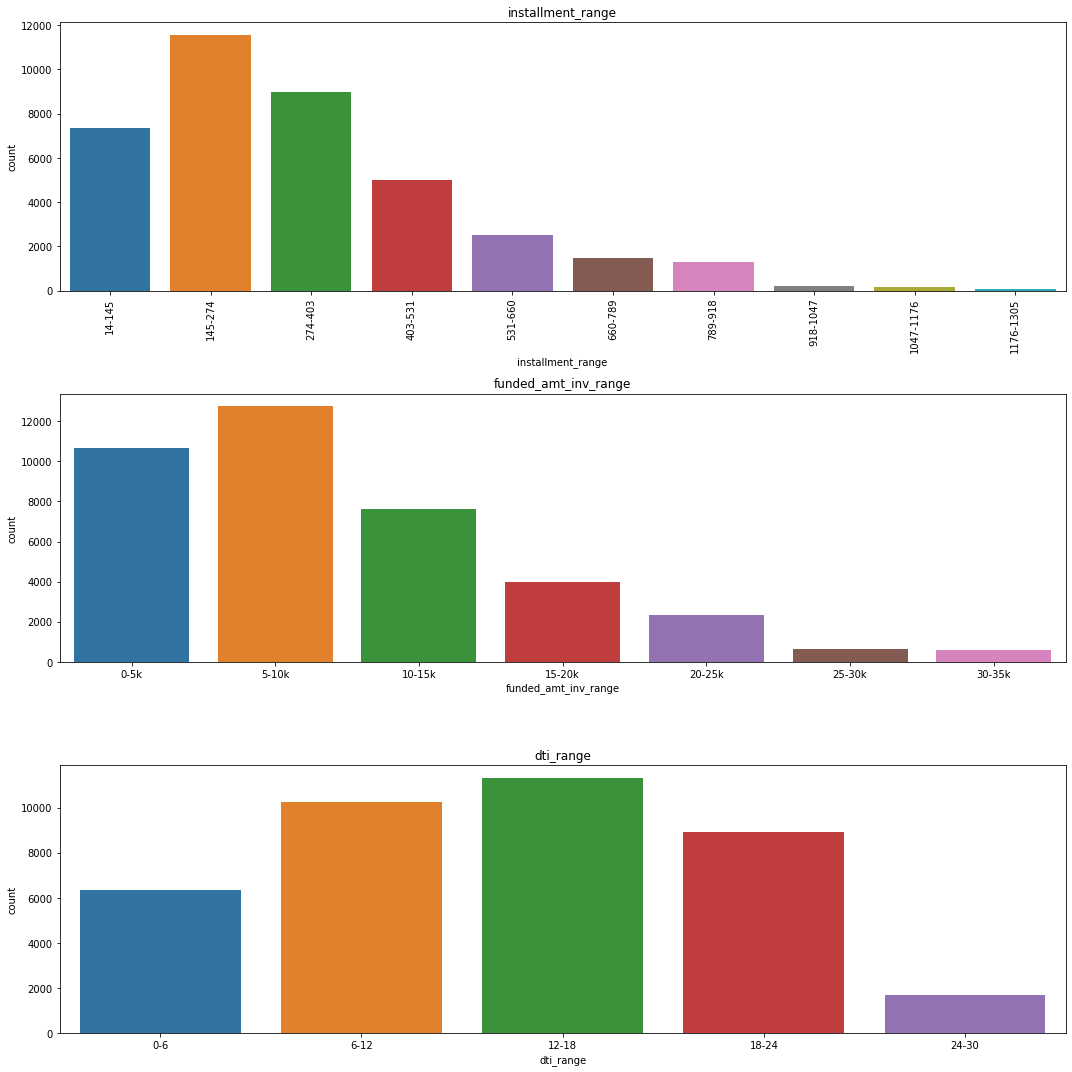

In [225]:
# plot analysis for derived metrics
derived_var=['installment_range','funded_amt_inv_range','dti_range'] # list for derived columns
plt.figure(figsize=(15,15)) # setting figure size
for i in range(len(derived_var)):
    plt.subplot(len(derived_var),1,i+1)
    sns.countplot(x=loandf[derived_var[i]],data=loandf) # countplot
    if loandf[derived_var[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.title(derived_var[i])
    plt.tight_layout()
    

#### Since we need to analyze variable factor which is causing behind default, hence analysing data only for default borrowers

In [226]:
# dataframe for default borrowers
loandf_defaulted=loandf[loandf.loan_status=='Charged Off']

In [227]:
derived_cat_cols=loandf_cat_col+derived_var # adding derived metrics to category variables
print(derived_cat_cols)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies', 'issue_month', 'issue_year', 'installment_range', 'funded_amt_inv_range', 'dti_range']


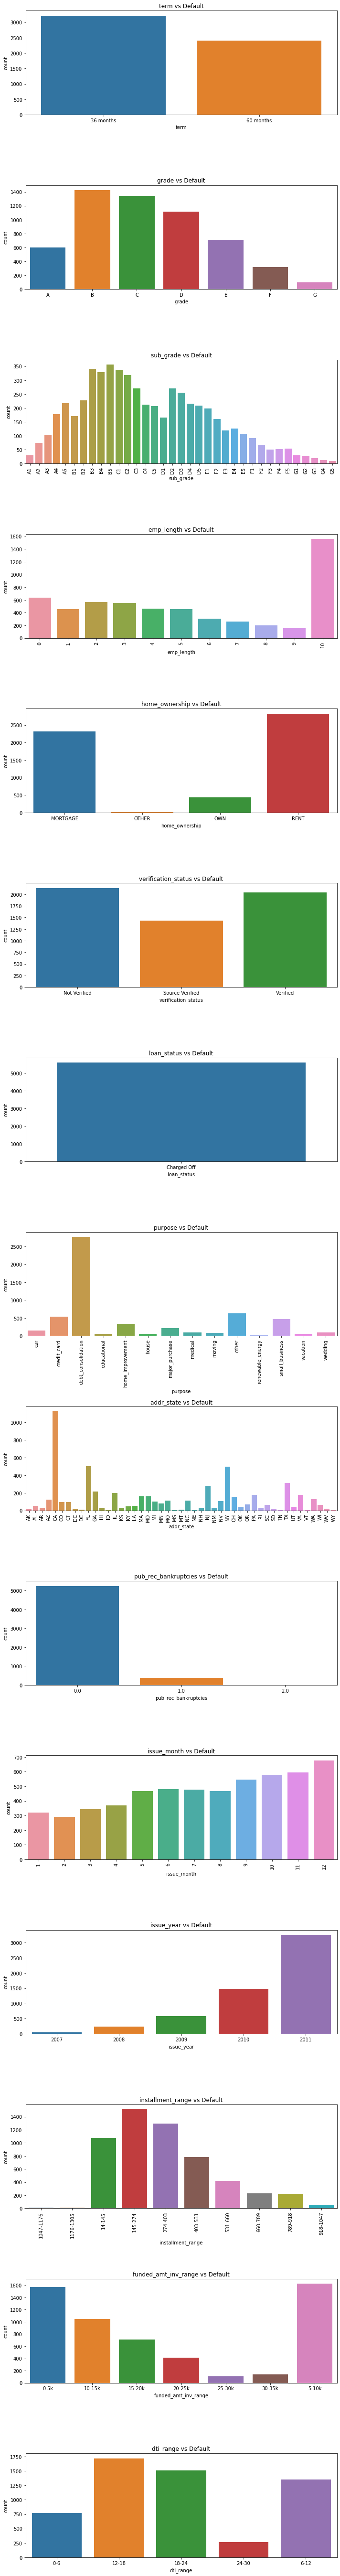

In [228]:
# plotting chart for only default borrowers
plt.figure(figsize=(10,75)) # setting figure size
for i in range(len(derived_cat_cols)):
    plt.subplot(len(derived_cat_cols),1,i+1)
    sns.countplot(x=loandf_defaulted[derived_cat_cols[i]],data=loandf_defaulted,order=sorted(loandf_defaulted[derived_cat_cols[i]].unique())) # boxplot
    if loandf[derived_cat_cols[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.title(derived_cat_cols[i]+' vs Default')
    plt.tight_layout()
    

## Categorical chart analysis Observations:

- More than 75% of Borrowers opted for 36 month tenure.
- Most of the loans are from grade B, C & A. B grade has the maximum no of of loans more than 30%.
- A4 sub grade has maximum share with 7.4%
- Most of loans are taken by employee having more than 10 years of service which is 24.7%.
- Applicants who lives on Rent or have Mortgage home ownership are the most took the loan, which is 47.7% & 44.1 5 respectively. And those who own house takes less loan.
- There are high no of applicants whose income was not verified at 43.25%, which is a bad sign that without income verification loan get approved.
- 85.4% of the loans were fully paid while 14.6% defaulted the loan.
- Most of the loans were take for the purpose of Debt consolidation, which is 46.8% followed by credit card at 13%.
- Most of the borrowers are from CA & NY.
- More than 95% does not have public record bankruptcies
- In the month of November & December maximum no of loans get issued,which is more than 10% in each month.
- In the Year 2011 most of the loans got issued, which is 53.2%
- Also LC is doubling loan issue every year which is good business indication.

## Categorical chart analysis for defaulted borrowers:
### There is high probability of default when:
- Applicant have tenure of 36 months
- When grade is B
- Subgrade is B3-C2
- Employee service length is more than 10 years
- Home ownership is RENT
- When income has not verified status
- When loan purpose is Debt consolidation
- when borrower is from CA state
- when loan issue month is December
- loan Issued year in 2011, It is past so year may not have the useful insight however there may be certain event in 2011 which might tell us reason behind higher default in certain year.
- when installement range is 145-274
- when funded amount inv is 0-5k and 5-10K
- when dti range is 12-18

# 4. Segmented Univariate Analysis

## Loan Amount :
- Plotting boxplot for Loan amount against all categorical variable

#### segmented univariate analysis for loan amount

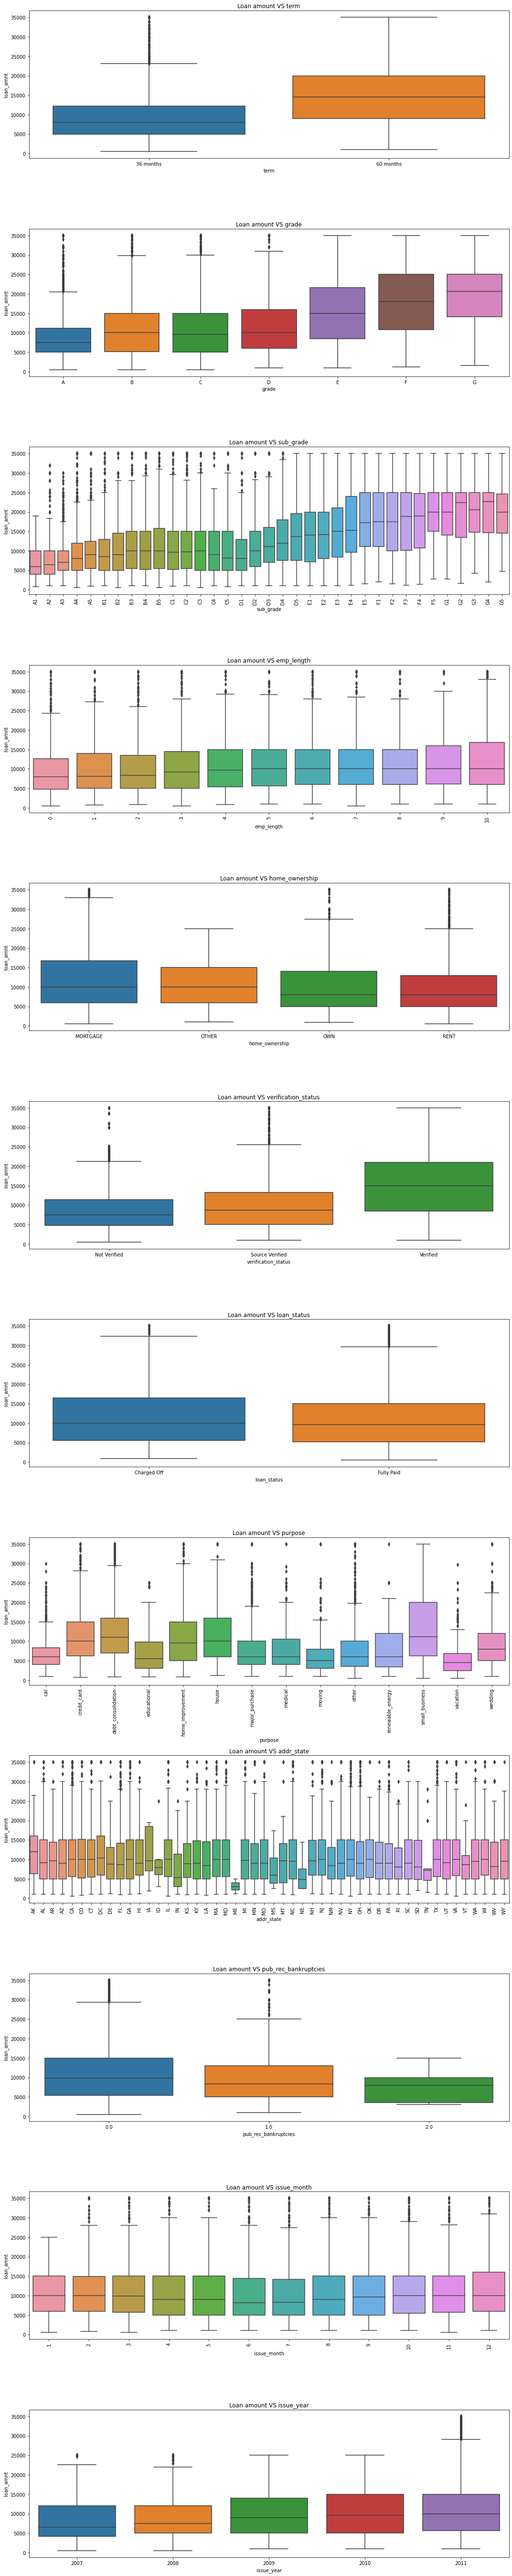

In [229]:
plt.figure(figsize=(15,75))# set cart size
#plt.figure(figsize=(15,35)) # this was used for reduced size of screenshot purpose to use in ppt
for i in range(len(loandf_cat_col)):
    #plt.subplot(7,2,i+1)  # this was used for reduced size of screenshot purpose to use in ppt 
    plt.subplot(len(loandf_cat_col),1,i+1)
    sns.boxplot(x=loandf_cat_col[i],y=loandf.loan_amnt,order=sorted(loandf[loandf_cat_col[i]].unique()), data=loandf) # boxplot
    plt.title('Loan amount VS '+loandf_cat_col[i])
    if loandf[loandf_cat_col[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.tight_layout()
    

## Loan amount analysis Observations:

- Higher loan amount has higher tenure
- Grade G & F has the higher loan amount, pattern can be noticed as increasing grade(A->G) loan amount is also increasing.
- there is no strong pattern of loan amount with employee service length, however more than 10 years of employee takes higher loan amount.
- Mortgage ownership applicant take higher loan amount.
- LC has given higher loan amounts to income verified borrowers.
- Higher loan amounts has higher probability of defaulting.
- Higher loan amount has been taken by small business followed by debt consolidation
- Borrowers who has no of public record bankruptcies 0 has taken the higher loan amount
- Higher loan amounts were taken in December month and 2011.

## Funded Amount :
- Plotting boxplot for funded amount against all categorical variable

#### segmented univariate analysis for funded amount

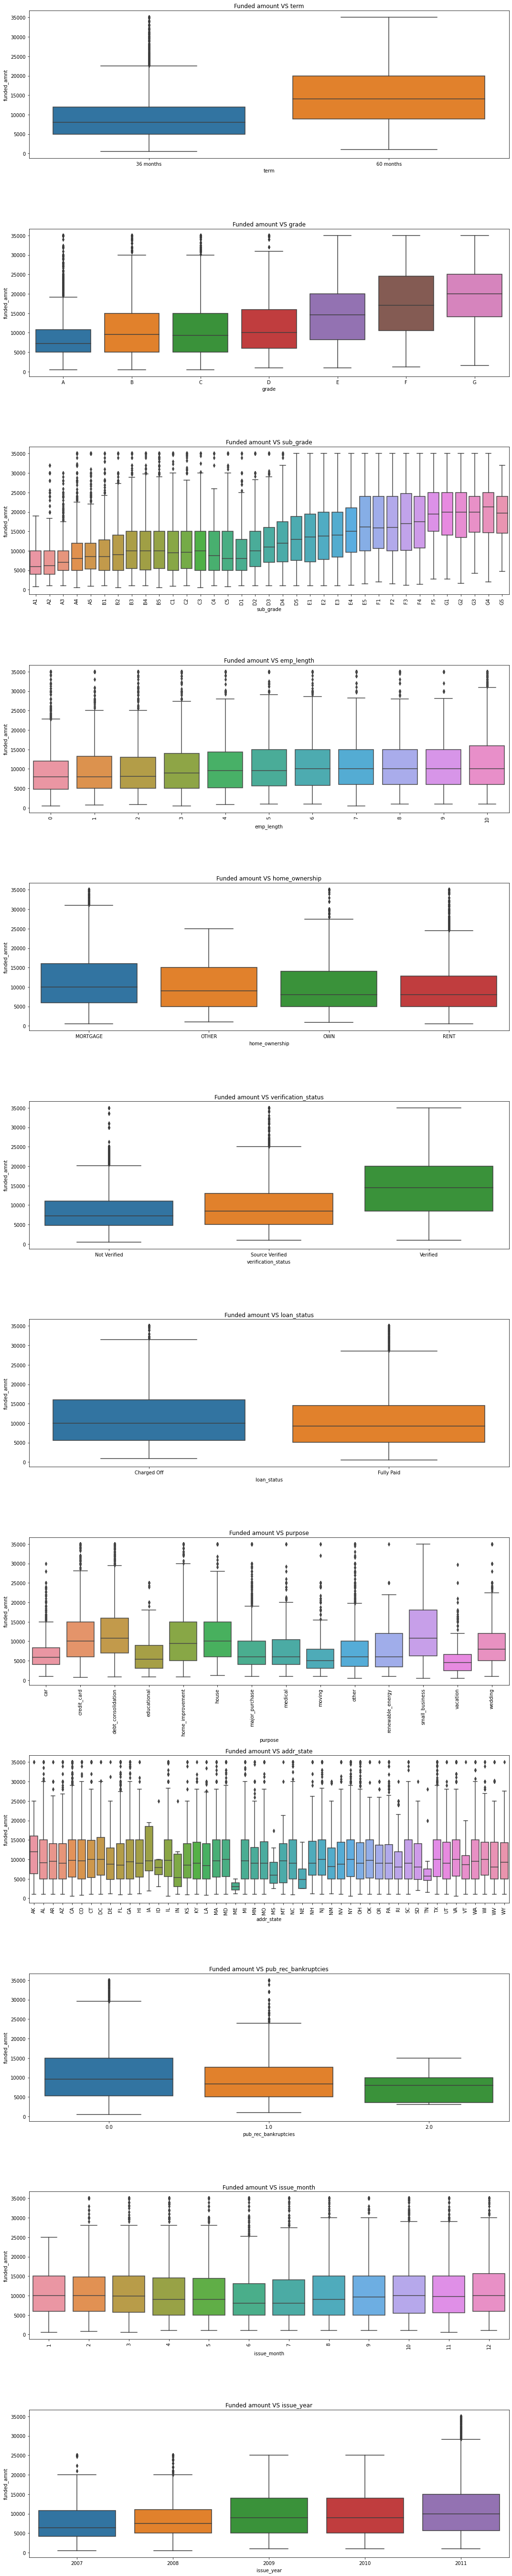

In [230]:
plt.figure(figsize=(15,75))# set cart size
for i in range(len(loandf_cat_col)):
    plt.subplot(len(loandf_cat_col),1,i+1)
    sns.boxplot(x=loandf_cat_col[i],y=loandf.funded_amnt,order=sorted(loandf[loandf_cat_col[i]].unique()), data=loandf) # boxplot
    plt.title('Funded amount VS '+loandf_cat_col[i])
    if loandf[loandf_cat_col[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.tight_layout()
    

## Funded amount analysis Observations:

- Funded amount has similar behaviour as of loan amounts

## Interest rate :
- Interest rate boxplot against all categorical variable

#### segmented univariate analysis for Interest rate

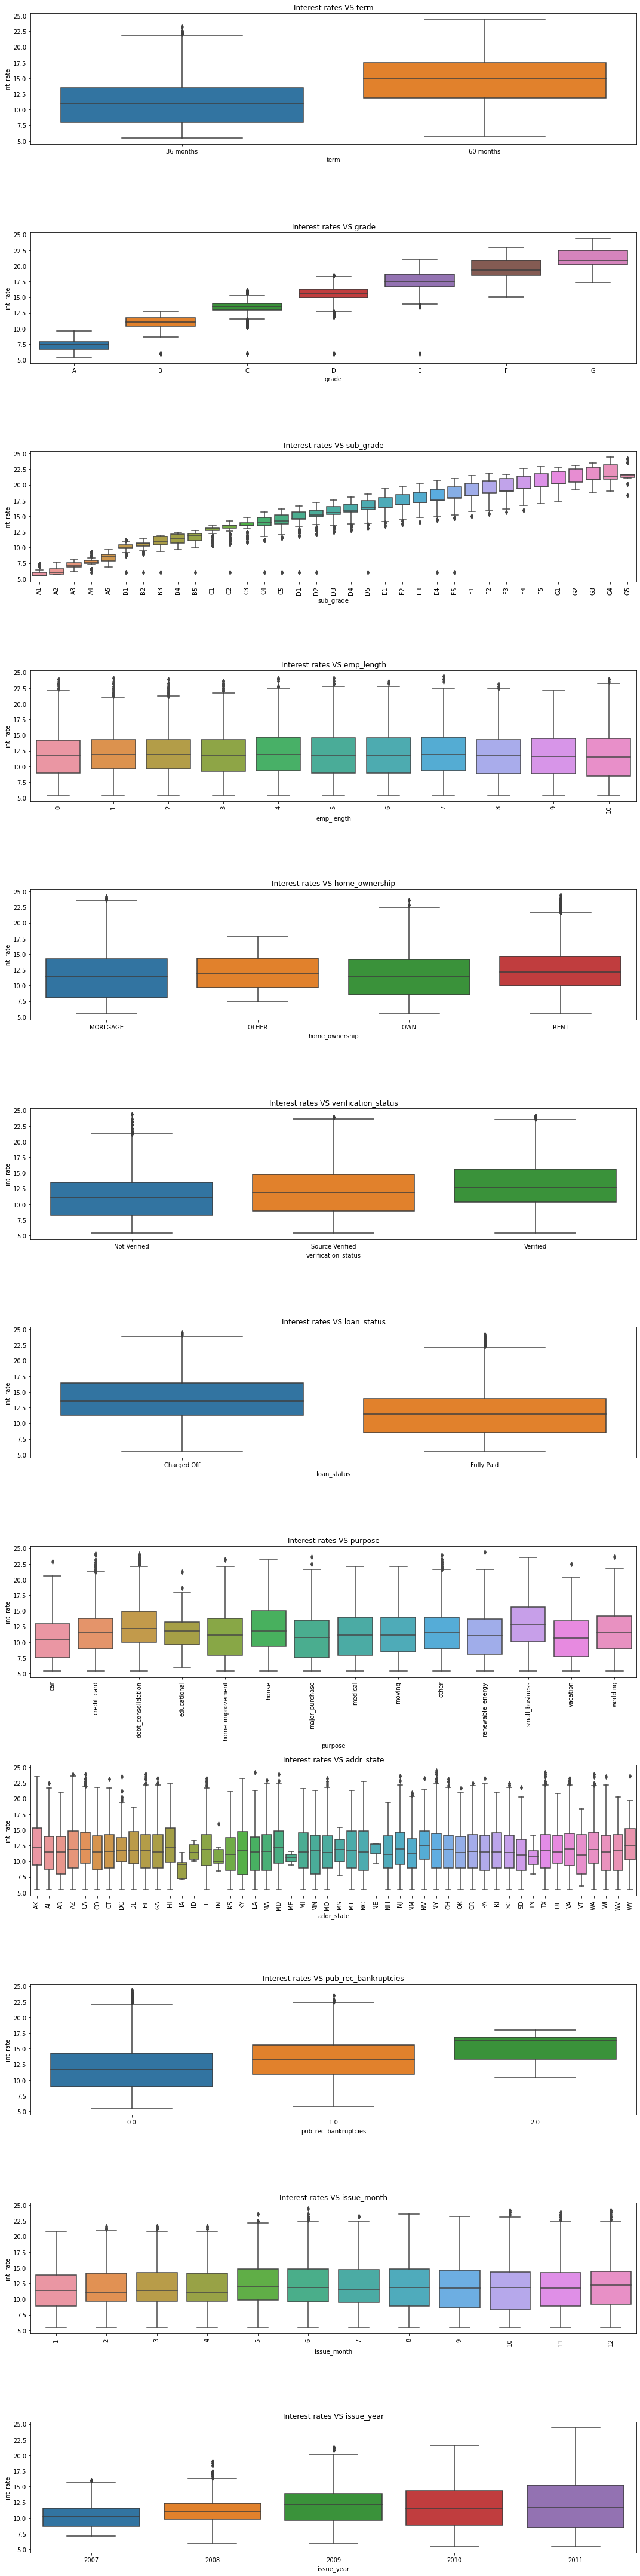

In [231]:
#plt.figure(figsize=(15,50))# set cart size
plt.figure(figsize=(15,60))
for i in range(len(loandf_cat_col)):
    #plt.subplot(7,2,i+1)
    plt.subplot(len(loandf_cat_col),1,i+1)
    sns.boxplot(x=loandf_cat_col[i],y=loandf.int_rate,order=sorted(loandf[loandf_cat_col[i]].unique()), data=loandf) # boxplot
    plt.title('Interest rates VS '+loandf_cat_col[i])
    if loandf[loandf_cat_col[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.tight_layout()
    

## Interest Rates analysis Observations:

- Higher tenure has higher interest rates.
- Grade G & F has the higher interest rates, pattern can be noticed as increasing grade(A->G) interest rate is also increasing.
- Also interest rates are increasing for subgrades A1->G5
- Employee service length does not have any strong pattern on interest rates.
- Borrowers who lives on RENT has little higher intrest rates.
- Borrowers who's income is verified has higher interest rates.
- Borrowers who defaultes had higher interest rates.
- Small business, house and debt consolidation loans given on higher intrest rates.
- Borrowers who had public record bankruptcies got loan on high intrest rates followed by 1 public record bankruptcies.
- Issue month & year does not have any strong relationship with intrest rate as median is almost same throughout.

## Annual Income :
- Annual Income boxplot against all categorical variable

#### segmented univariate analysis for Annual Income

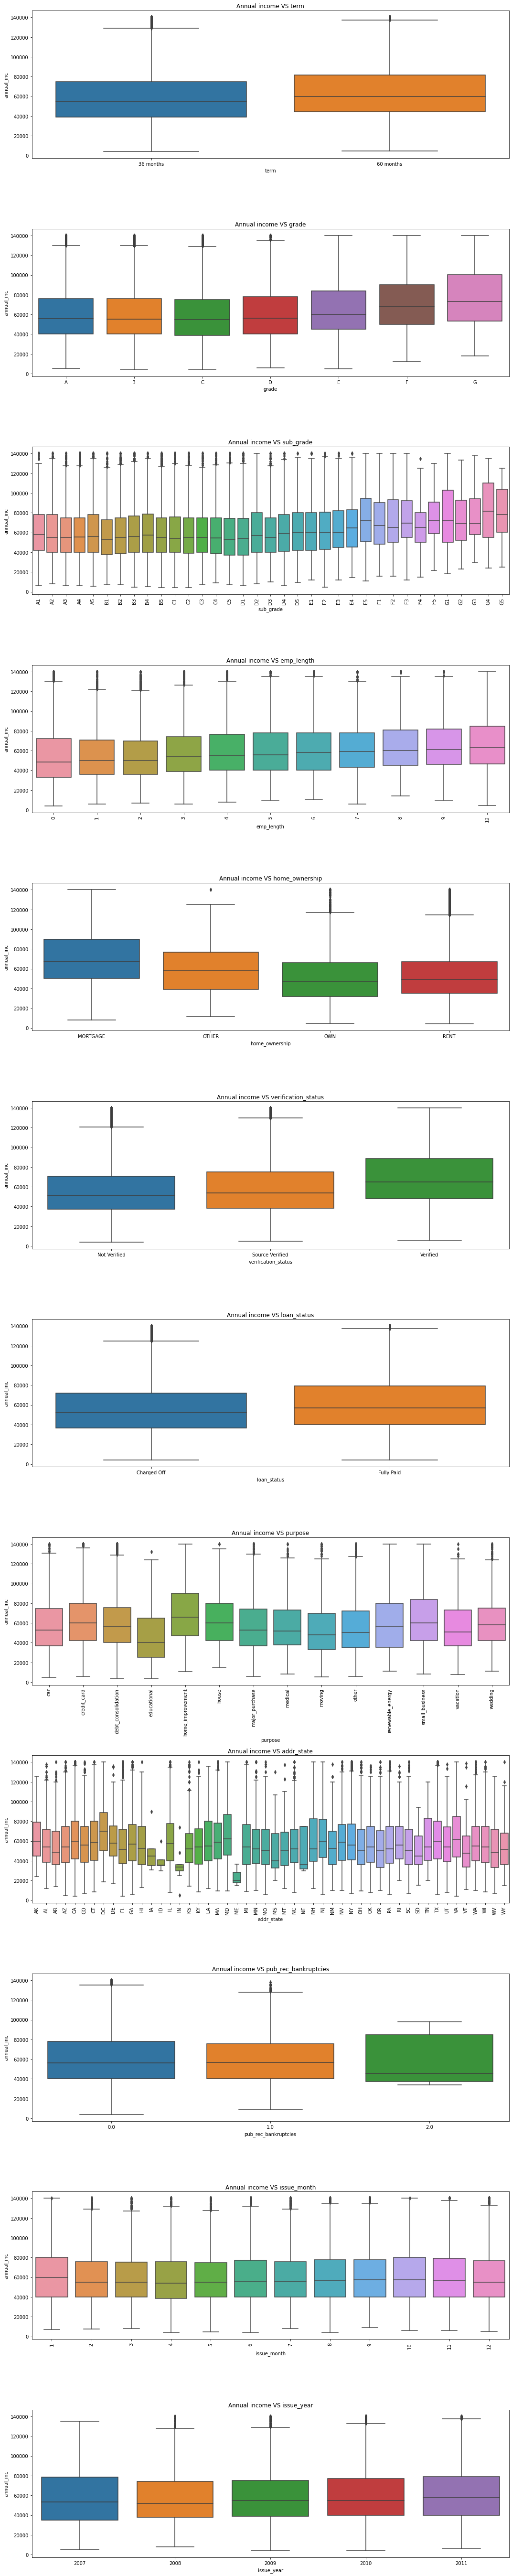

In [232]:
# We will consider outlier treated data for annual income analysis as there is high variation in outlier income with mean income
# outlier treated dataframe : loandf_ol_treated
plt.figure(figsize=(15,75))# set cart size
#plt.figure(figsize=(15,35))# this was used for reduced size of screenshot purpose to use in ppt
for i in range(len(loandf_cat_col)):
    #plt.subplot(7,2,i+1)# this was used for reduced size of screenshot purpose to use in ppt
    plt.subplot(len(loandf_cat_col),1,i+1)
    sns.boxplot(x=loandf_cat_col[i],y=loandf_ol_treated.annual_inc,order=sorted(loandf_ol_treated[loandf_cat_col[i]].unique()), data=loandf_ol_treated) # boxplot
    plt.title('Annual income VS '+loandf_cat_col[i])
    if loandf[loandf_cat_col[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.tight_layout()
    

## Annual Income analysis Observations:

- Grade G & F has the higher annual income, pattern can be noticed as increasing grade(A->G) annual income is also increasing slightly.
- Annual income does not shows strong relationship with subgrades as median almost similar across subgrades.
- Employee service length does not have any strong pattern on annual income.
- Borrowers who has Mortgage ownership has higher anuual income.
- Borrowers who's income is verified has higher annual income.
- Borrowers who fully paid had higher annual income.
- Borrower who took loan for home improvement had higher income.

## DTI (Debt to Income ratio):
- DTI boxplot against all categorical variable

#### segmented univariate analysis for DTI

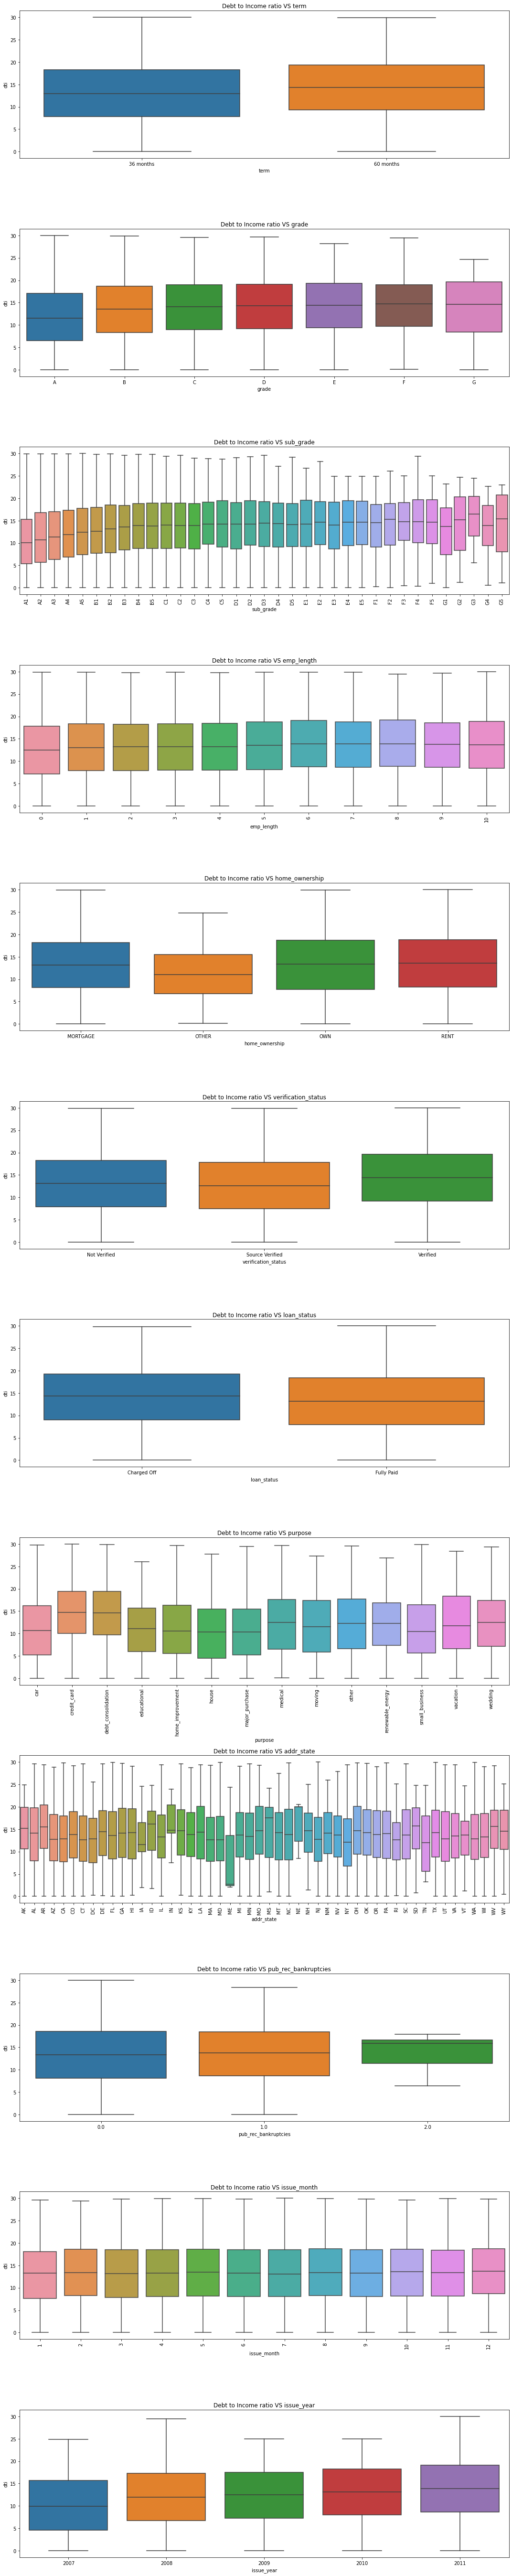

In [233]:
plt.figure(figsize=(15,75))# set cart size
for i in range(len(loandf_cat_col)):
    plt.subplot(len(loandf_cat_col),1,i+1)
    sns.boxplot(x=loandf_cat_col[i],y=loandf.dti,order=sorted(loandf[loandf_cat_col[i]].unique()), data=loandf) # boxplot
    plt.title('Debt to Income ratio VS '+loandf_cat_col[i])
    if loandf[loandf_cat_col[i]].nunique()>=10:
        plt.xticks(rotation=90)
    plt.tight_layout()
    

## DTI analysis Observations:

- Borrowers who took loan with high tenure has high DTI.
- A grade borrowers has low DTI
- Borrower with home ownersip as Other has less DTI.
- Borrower who has high DTI defaulted more.
- Borrower who took loan for credit card and debt consolidation has the high DTI

## Number of public record bankruptcies:
- Number of public record bankruptcies countplot against all other categorical variable

#### segmented univariate analysis for pub_rec_bankruptcies

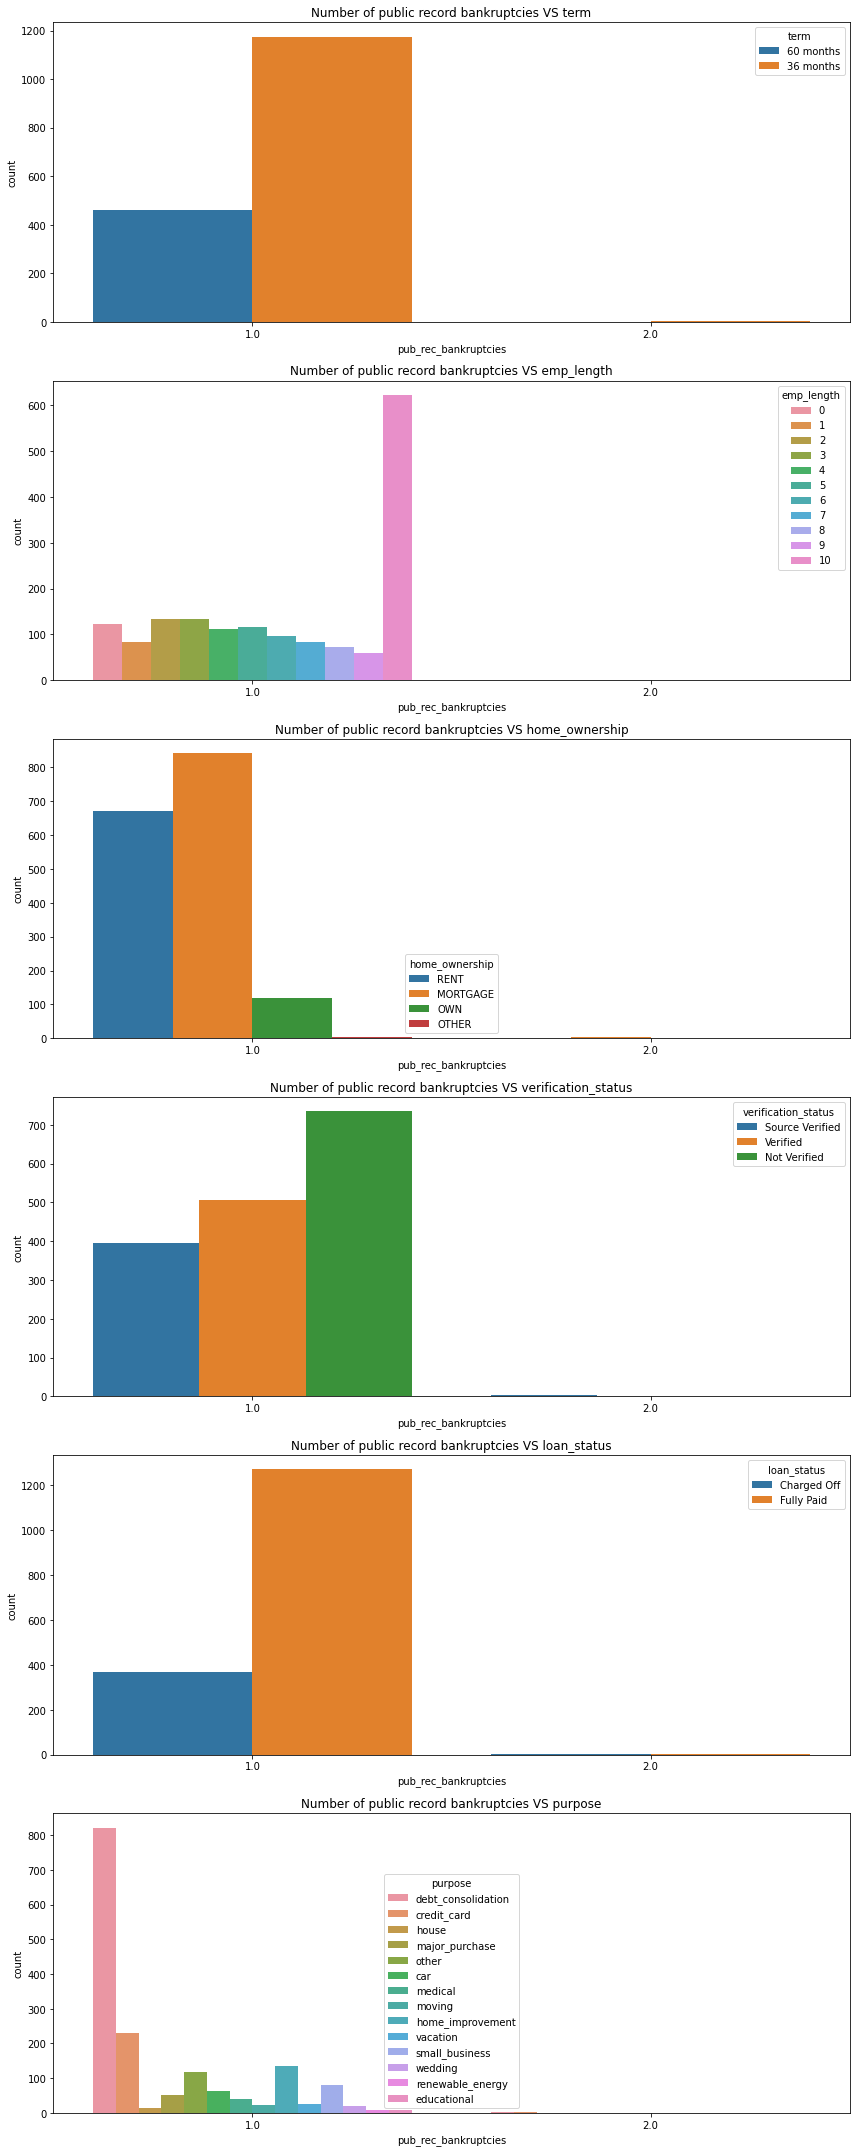

In [234]:
plt.figure(figsize=(12,30))# set cart size
#excluding few columns which does not have meaningfull relationship with Number of public record bankruptcies
excluded_columns=['grade','sub_grade','pub_rec_bankruptcies','addr_state','issue_month','issue_year']
j=1  # variable for the subplot counter
for i in range(len(loandf_cat_col)):
    if loandf_cat_col[i] not in excluded_columns:
        plt.subplot(len(loandf_cat_col)-len(excluded_columns),1,j)
        sns.countplot(loandf.pub_rec_bankruptcies[loandf.pub_rec_bankruptcies>0],hue=loandf_cat_col[i],data=loandf[loandf.pub_rec_bankruptcies>0]) # countplot
        plt.title('Number of public record bankruptcies VS '+loandf_cat_col[i])
        #if loandf[loandf_cat_col[i]].nunique()>=10:
         #   plt.xticks(rotation=90)
        plt.tight_layout()
        j+=1
    

## Number of public record bankruptcies analysis Observations:

#### Since more than 95% of borrowers does not have any public record bankruptcies, hence this analysis is not uch insightful for our analysis, however borrowers who has  public record bankruptcies, below are the observations:
- high borrowers has Number of public record bankruptcies who took loan for 36 month tenure
- employee service length more than 10 years has higher Number of public record bankruptcies
- borrower with mortgage ownership has higher Number of public record bankruptcies
- Higher Number of borrowers who has public record bankruptcies, income is not verified.
- Higher Number of fully paid borrower has Number of public record bankruptcies

# 5. Bivariate Analysis:

## Analyzing Term vs Loan status

In [235]:
#create new dataframe grouped by term & loan_status
df_term=loandf.groupby(by=['term','loan_status'],as_index=False).id.count()
#create proportion
df_term['ratio']=df_term.groupby('term').transform(lambda x:x/x.sum())
print(df_term)

        term  loan_status     id     ratio
0  36 months  Charged Off   3214  0.110641
1  36 months   Fully Paid  25835  0.889359
2  60 months  Charged Off   2397  0.252901
3  60 months   Fully Paid   7081  0.747099


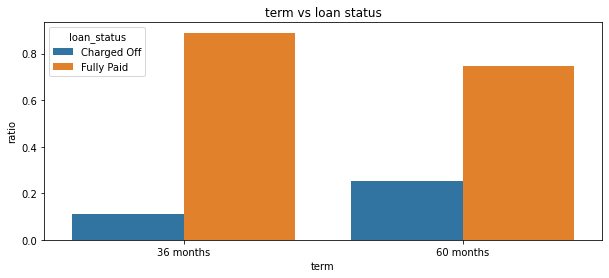

In [236]:
# barplot term vs ratio
plt.figure(figsize=(10,4))
sns.barplot(x='term',y='ratio',hue='loan_status',data=df_term)
plt.title('term vs loan status')
plt.show()

### Observations:
- proportion of defaultes borrowers is more in 60 months tenure.
- Fully paid proportion id high in 36 months tenure

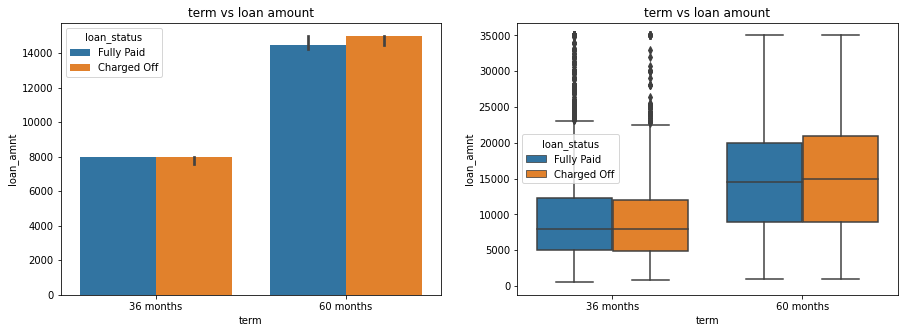

In [237]:
# we are analyzing median in barplot and boxplot for all distribution as well. term vs loan amount
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='term',y='loan_amnt',hue='loan_status',data=loandf,estimator=np.median)
plt.title('term vs loan amount')
plt.subplot(1,2,2)
sns.boxplot(x='term',y='loan_amnt',hue='loan_status',data=loandf)
plt.title('term vs loan amount')
plt.show()

### Observations:
- Loan amount does not give any indication of default. For both 36 & 60 month it is almost equally distributes

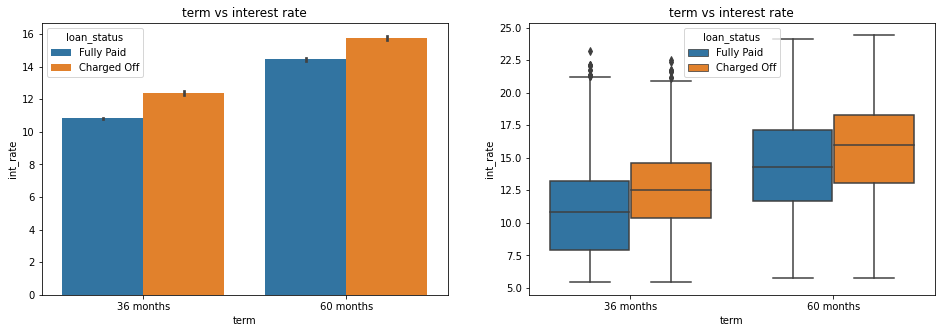

In [238]:
# we are analyzing median in barplot and boxplot for all distribution as well. term vs Interest rate
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='term',y='int_rate',hue='loan_status',data=loandf)
plt.title('term vs interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='term',y='int_rate',hue='loan_status',data=loandf)
plt.title('term vs interest rate')
plt.show()

### Observations:
- Higher intrest rate in 60 month tenure has higher default probability

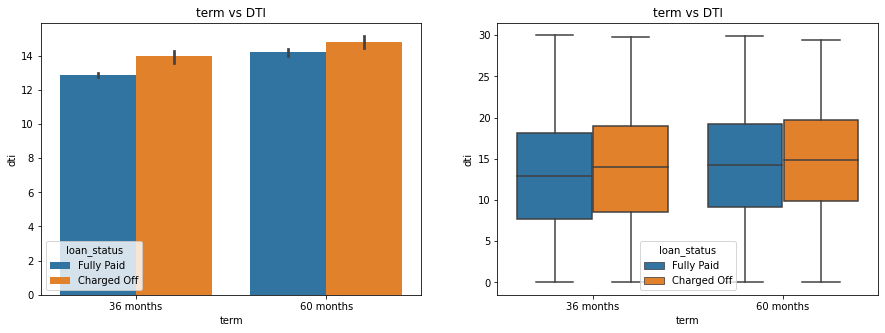

In [239]:
# we are analyzing median in barplot and boxplot for all distribution as well. term vs dti
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='term',y='dti',hue='loan_status',data=loandf,estimator=np.median)
plt.title('term vs DTI')
plt.subplot(1,2,2)
sns.boxplot(x='term',y='dti',hue='loan_status',data=loandf)
plt.title('term vs DTI')
plt.show()

### Observations:
- Higher dti has higher default probability if borrower's tenure is 60 months

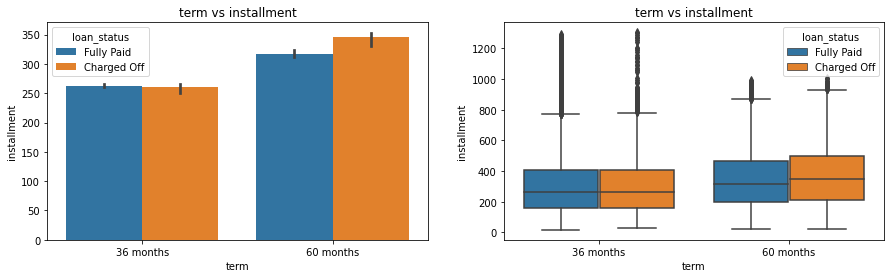

In [240]:
# we are analyzing median in barplot and boxplot for all distribution as well. term vs installment
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='term',y='installment',hue='loan_status',data=loandf,estimator=np.median)
plt.title('term vs installment')
plt.subplot(1,2,2)
sns.boxplot(x='term',y='installment',hue='loan_status',data=loandf)
plt.title('term vs installment')
plt.show()

### Observations:
- Higher installment has higher default probability if borrower's tenure is 60 months

## Analyzing Grade vs Loan status

In [241]:
#create new dataframe grouped by grade & loan_status
df_grade=loandf.groupby(by=['grade','loan_status'],as_index=False).id.count()
#create proportion
df_grade['ratio']=df_grade.groupby('grade').transform(lambda x:x/x.sum())
print(df_grade)

   grade  loan_status     id     ratio
0      A  Charged Off    602  0.059930
1      A   Fully Paid   9443  0.940070
2      B  Charged Off   1425  0.122066
3      B   Fully Paid  10249  0.877934
4      C  Charged Off   1343  0.171739
5      C   Fully Paid   6477  0.828261
6      D  Charged Off   1115  0.219964
7      D   Fully Paid   3954  0.780036
8      E  Charged Off    711  0.268100
9      E   Fully Paid   1941  0.731900
10     F  Charged Off    316  0.325773
11     F   Fully Paid    654  0.674227
12     G  Charged Off     99  0.333333
13     G   Fully Paid    198  0.666667


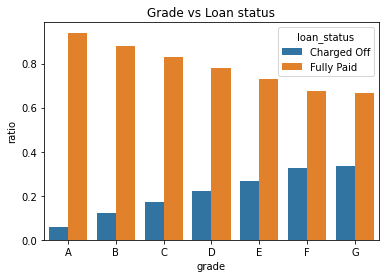

In [242]:
# barplot grade vs ratio
plt.figure(figsize=(6,4))
sns.barplot(x='grade',y='ratio',hue='loan_status',data=df_grade)
plt.title('Grade vs Loan status')
plt.show()

### Observations:
- Higher default probability as grade increases A->G.

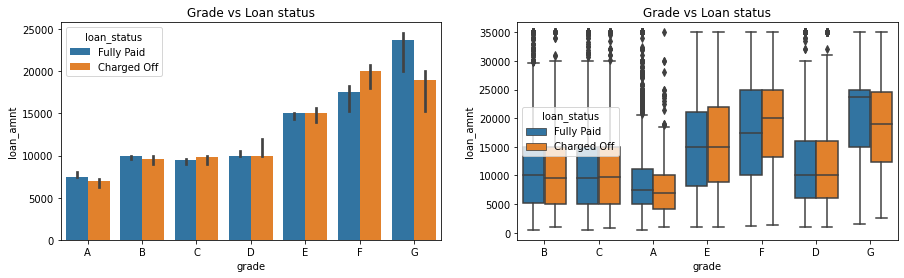

In [243]:
# we are analyzing median in barplot and boxplot for all distribution as well. grade vs loan amount
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='grade',y='loan_amnt',hue='loan_status',data=loandf,order=sorted(loandf.grade.unique()),estimator=np.median)
plt.title('Grade vs Loan status')
plt.subplot(1,2,2)
sns.boxplot(x='grade',y='loan_amnt',hue='loan_status',data=loandf)
plt.title('Grade vs Loan status')
plt.show()

### Observations:
- As grade increases A->G higher loan amount has been taken.
- difference in fully paid and defaulted increases as grade increases A->G
- Higher default probability as grade increases A->G
- Grade G takes the high loan amount and default more however fully paid is more than defaulter and so considering grade G in high defaulting zome may be cause in credit loss.
- Grade F has high default borrower than fully paid off and so we may say that grade F is defaulting grade.

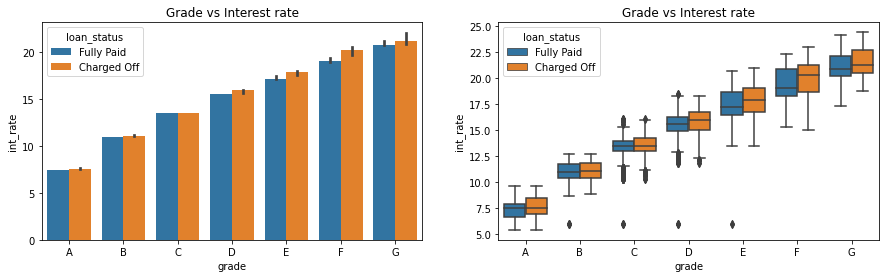

In [244]:
# we are analyzing median in barplot and boxplot for all distribution as well. grade vs interest rate
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='grade',y='int_rate',hue='loan_status',data=loandf,order=sorted(loandf.grade.unique()),estimator=np.median)
plt.title('Grade vs Interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='grade',y='int_rate',hue='loan_status',data=loandf,order=sorted(loandf.grade.unique()))
plt.title('Grade vs Interest rate')
plt.show()

### Observations:
- As grade increases A->G higher interest rate is applicable.
- Both fully paid and defaulter increases as grade increases A->G in similar maner.

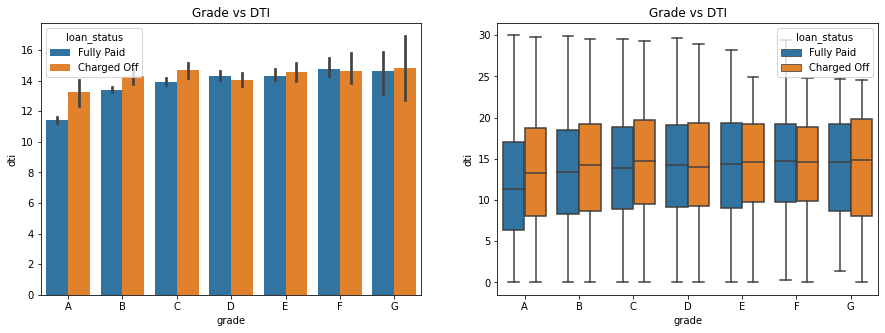

In [245]:
# we are analyzing median in barplot and boxplot for all distribution as well. grade vs dti
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='grade',y='dti',hue='loan_status',data=loandf,order=sorted(loandf.grade.unique()),estimator=np.median)
plt.title('Grade vs DTI')
plt.subplot(1,2,2)
sns.boxplot(x='grade',y='dti',hue='loan_status',data=loandf,order=sorted(loandf.grade.unique()))
plt.title('Grade vs DTI')
plt.show()

### Observations:
- No useful insight found.

## Analyzing Employment length vs Loan status

In [246]:
#create new dataframe grouped by emp_length & loan_status
df_emp=loandf.groupby(by=['emp_length','loan_status'],as_index=False).id.count()
#create proportion
df_emp['ratio']=df_emp.groupby('emp_length').transform(lambda x:x/x.sum())
print(df_emp)

    emp_length  loan_status    id     ratio
0            0  Charged Off   635  0.141237
1            0   Fully Paid  3861  0.858763
2            1  Charged Off   453  0.143218
3            1   Fully Paid  2710  0.856782
4            2  Charged Off   566  0.132058
5            2   Fully Paid  3720  0.867942
6            3  Charged Off   555  0.138473
7            3   Fully Paid  3453  0.861527
8            4  Charged Off   460  0.137931
9            4   Fully Paid  2875  0.862069
10           5  Charged Off   457  0.143260
11           5   Fully Paid  2733  0.856740
12           6  Charged Off   305  0.140878
13           6   Fully Paid  1860  0.859122
14           7  Charged Off   263  0.153981
15           7   Fully Paid  1445  0.846019
16           8  Charged Off   202  0.140963
17           8   Fully Paid  1231  0.859037
18           9  Charged Off   158  0.128874
19           9   Fully Paid  1068  0.871126
20          10  Charged Off  1557  0.163602
21          10   Fully Paid  796

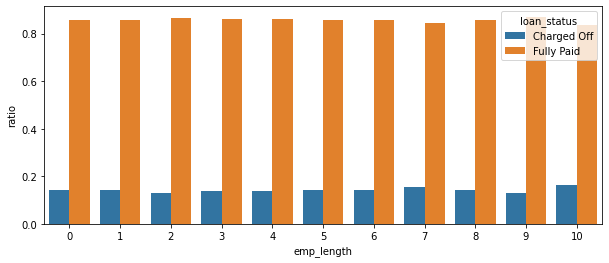

In [247]:
# barplot employee service length vs ratio
plt.figure(figsize=(10,4))
sns.barplot(x='emp_length',y='ratio',hue='loan_status',data=df_emp)
plt.show()

### Observations:
- No useful insight found.

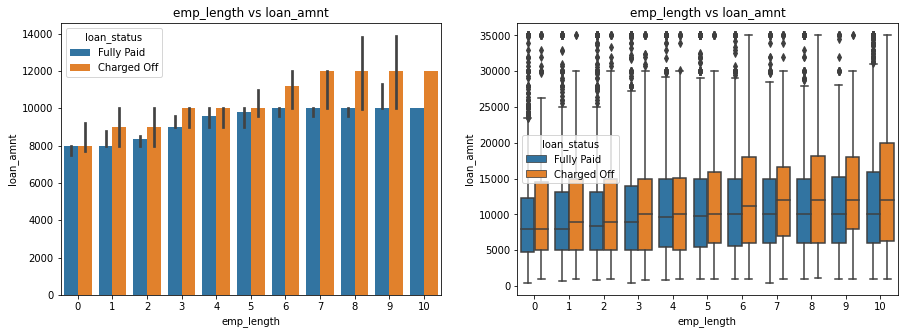

In [248]:
# we are analyzing median in barplot and boxplot for all distribution as well. length vs loan amount
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='emp_length',y='loan_amnt',hue='loan_status',data=loandf,order=sorted(loandf.emp_length.unique()),estimator=np.median)
plt.title('emp_length vs loan_amnt')
plt.subplot(1,2,2)
sns.boxplot(x='emp_length',y='loan_amnt',hue='loan_status',data=loandf,order=sorted(loandf.emp_length.unique()))
plt.title('emp_length vs loan_amnt')
plt.show()

### Observations:
- Applicant with higher service length took more loan amount and more prone to default as well.

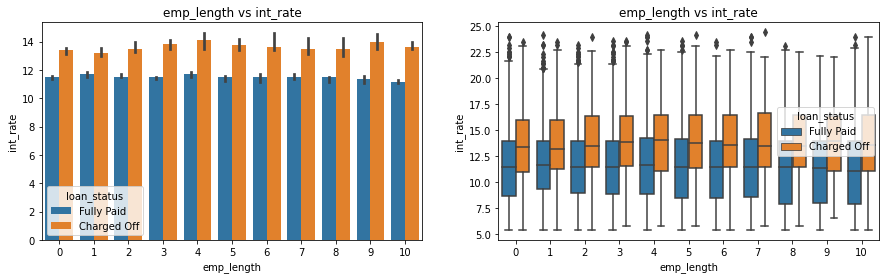

In [249]:
# we are analyzing median in barplot and boxplot for all distribution as well. employee service length vs Interest rate
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='emp_length',y='int_rate',hue='loan_status',data=loandf,order=sorted(loandf.emp_length.unique()),estimator=np.median)
plt.title('emp_length vs int_rate')
plt.subplot(1,2,2)
sns.boxplot(x='emp_length',y='int_rate',hue='loan_status',data=loandf,order=sorted(loandf.emp_length.unique()))
plt.title('emp_length vs int_rate')
plt.show()

### Observations:
- Irrespective of employment length, higher intrest rates are more prone to defaults.

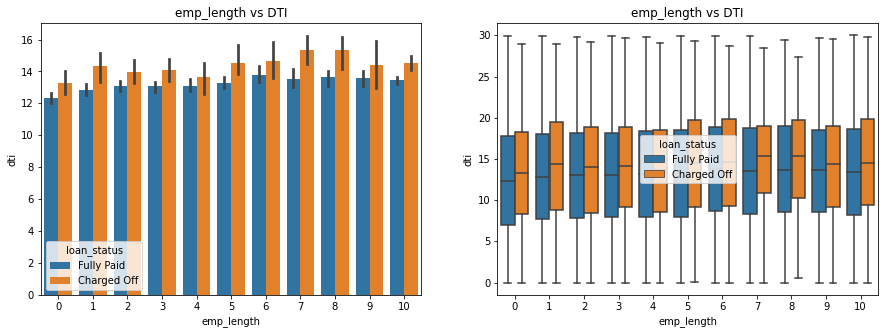

In [250]:
# we are analyzing median in barplot and boxplot for all distribution as well. employee service length vs dti
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='emp_length',y='dti',hue='loan_status',data=loandf,order=sorted(loandf.emp_length.unique()),estimator=np.median)
plt.title('emp_length vs DTI')
plt.subplot(1,2,2)
sns.boxplot(x='emp_length',y='dti',hue='loan_status',data=loandf,order=sorted(loandf.emp_length.unique()))
plt.title('emp_length vs DTI')
plt.show()

### Observations:
- No strong relationship however slight indication of higher DTI is prone to default irrespective of employment length.

## Analyzing Home ownership vs Loan status

In [251]:
#create new dataframe grouped by home_ownership & loan_status
df_ho=loandf.groupby(by=['home_ownership','loan_status'],as_index=False).id.count()
#create proportion
df_ho['ratio']=df_ho.groupby('home_ownership').transform(lambda x:x/x.sum())
print(df_ho)

  home_ownership  loan_status     id     ratio
0       MORTGAGE  Charged Off   2323  0.136567
1       MORTGAGE   Fully Paid  14687  0.863433
2          OTHER  Charged Off     18  0.187500
3          OTHER   Fully Paid     78  0.812500
4            OWN  Charged Off    441  0.148485
5            OWN   Fully Paid   2529  0.851515
6           RENT  Charged Off   2829  0.153325
7           RENT   Fully Paid  15622  0.846675


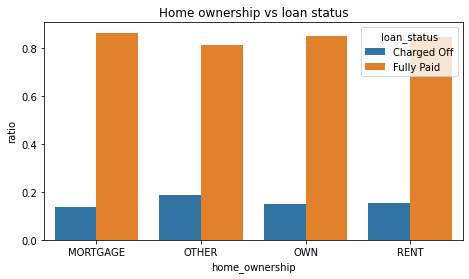

In [252]:
# barplot home_ownership vs ratio
plt.figure(figsize=(7.5,4))
sns.barplot(x='home_ownership',y='ratio',hue='loan_status',data=df_ho)
plt.title('Home ownership vs loan status')
plt.show()

### Observations:
- slight higher portion of default if borrower has home ownership as other

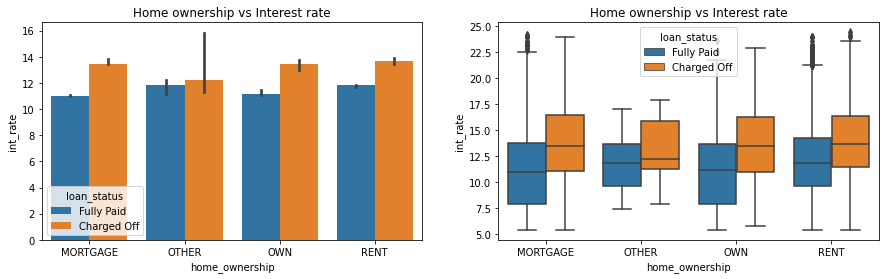

In [253]:
# barplot home ownership vs interest rate
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='int_rate',hue='loan_status',data=loandf,order=sorted(loandf.home_ownership.unique()),estimator=np.median)
plt.title('Home ownership vs Interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='home_ownership',y='int_rate',hue='loan_status',data=loandf,order=sorted(loandf.home_ownership.unique()))
plt.title('Home ownership vs Interest rate')
plt.show()

### Observations:
- Irrespective of home ownership category, higher intrest rates are more prone to defaults.

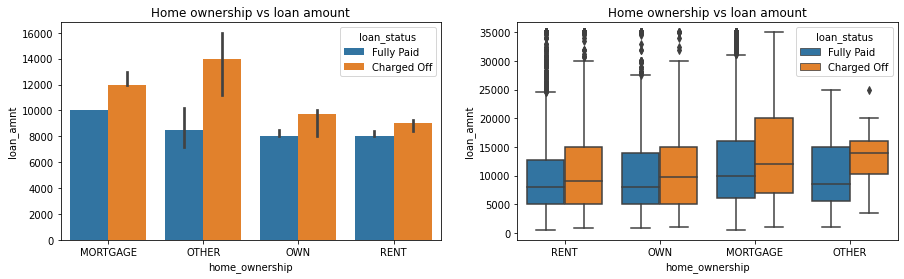

In [254]:
# barplot home ownership vs loan amount
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='loan_amnt',hue='loan_status',data=loandf,order=sorted(loandf.home_ownership.unique()),estimator=np.median)
plt.title('Home ownership vs loan amount')
plt.subplot(1,2,2)
sns.boxplot(x='home_ownership',y='loan_amnt',hue='loan_status',data=loandf)
plt.title('Home ownership vs loan amount')

plt.show()

### Observations:
- Mortgage ownership took higher loan amount.
- Higher loan amounts are more prone to default.

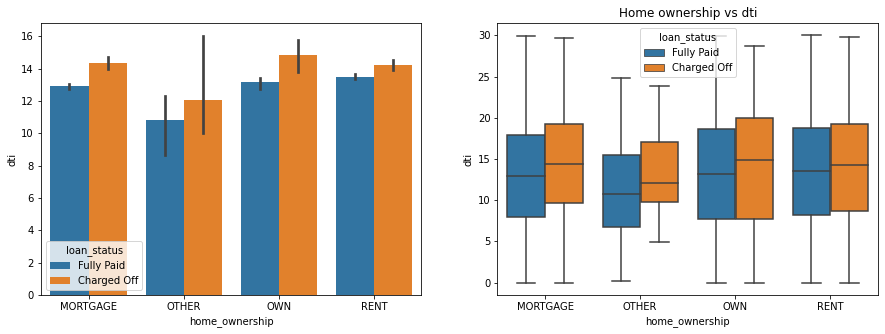

In [255]:
# barplot home ownership vs DTI
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='dti',hue='loan_status',data=loandf,order=sorted(loandf.home_ownership.unique()),estimator=np.median)
plt.subplot(1,2,2)
sns.boxplot(x='home_ownership',y='dti',hue='loan_status',data=loandf,order=sorted(loandf.home_ownership.unique()))
plt.title('Home ownership vs dti')

plt.show()

### Observations:
- Other ownership has less dti, and difference in defaulters and fully paid is slightly higher than other ownership categories.

## Analyzing Income verification vs Loan status

In [256]:
#create new dataframe grouped by verification_status & loan_status
df_vs=loandf.groupby(by=['verification_status','loan_status'],as_index=False).id.count()
#create proportion
df_vs['ratio']=df_vs.groupby('verification_status').transform(lambda x:x/x.sum())
print(df_vs)

  verification_status  loan_status     id     ratio
0        Not Verified  Charged Off   2135  0.128113
1        Not Verified   Fully Paid  14530  0.871887
2     Source Verified  Charged Off   1431  0.148045
3     Source Verified   Fully Paid   8235  0.851955
4            Verified  Charged Off   2045  0.167678
5            Verified   Fully Paid  10151  0.832322


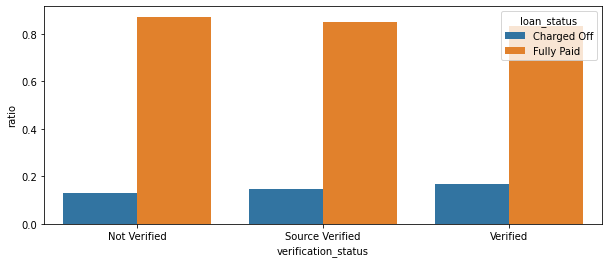

In [257]:
# barplot verification_status vs loan status ratio
plt.figure(figsize=(10,4))
sns.barplot(x='verification_status',y='ratio',hue='loan_status',data=df_vs)
plt.show()

### Observations:
- No useful insight found.

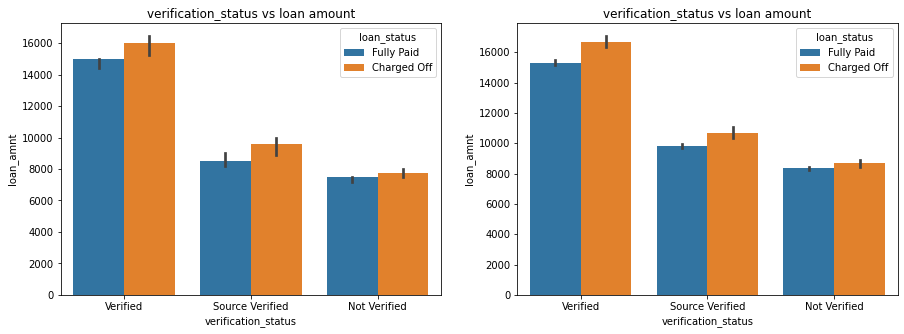

In [258]:
# we are analyzing median in barplot and boxplot for all distribution as well. verification_status vs loan amount
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='verification_status',y='loan_amnt',hue='loan_status',data=loandf,estimator=np.median)
plt.title('verification_status vs loan amount')
plt.subplot(1,2,2)
sns.barplot(x='verification_status',y='loan_amnt',hue='loan_status',data=loandf)
plt.title('verification_status vs loan amount')
plt.show()

### Observations:
- Borrowers with verified income got higher loan amount, Also they are more prone to default.

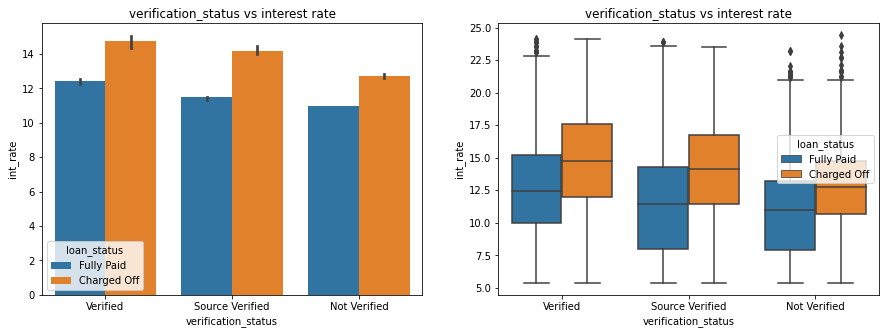

In [259]:
# we are analyzing median in barplot and boxplot for all distribution as well. verification_status vs interest rate
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='verification_status',y='int_rate',hue='loan_status',data=loandf,estimator=np.median)
plt.title('verification_status vs interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='verification_status',y='int_rate',hue='loan_status',data=loandf)
plt.title('verification_status vs interest rate')
plt.show()

### Observations:
- Irrespective of verification status, higher intrest rates are more prone to defaults.

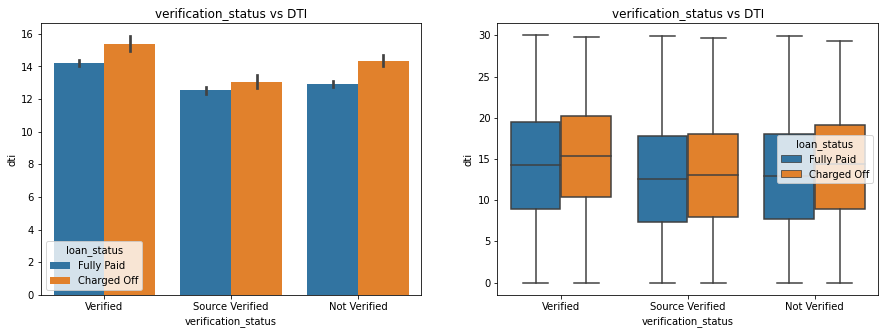

In [260]:
# we are analyzing median in barplot and boxplot for all distribution as well. verification_status vs interest rate
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='verification_status',y='dti',hue='loan_status',data=loandf,estimator=np.median)
plt.title('verification_status vs DTI')
plt.subplot(1,2,2)
sns.boxplot(x='verification_status',y='dti',hue='loan_status',data=loandf)
plt.title('verification_status vs DTI')
plt.show()

### Observations:
- In each of the verification status, higher DTI are more prone to default.

## Analyzing Purpose vs Loan status

In [261]:
#create new dataframe grouped by purpose & loan_status
df_purpose=loandf.groupby(by=['purpose','loan_status'],as_index=False).id.count()
#create proportion
df_purpose['ratio']=df_purpose.groupby('purpose').transform(lambda x:x/x.sum())
print(df_purpose)

               purpose  loan_status     id     ratio
0                  car  Charged Off    159  0.106212
1                  car   Fully Paid   1338  0.893788
2          credit_card  Charged Off    541  0.107662
3          credit_card   Fully Paid   4484  0.892338
4   debt_consolidation  Charged Off   2762  0.153079
5   debt_consolidation   Fully Paid  15281  0.846921
6          educational  Charged Off     56  0.173913
7          educational   Fully Paid    266  0.826087
8     home_improvement  Charged Off    344  0.119861
9     home_improvement   Fully Paid   2526  0.880139
10               house  Charged Off     59  0.160763
11               house   Fully Paid    308  0.839237
12      major_purchase  Charged Off    221  0.103078
13      major_purchase   Fully Paid   1923  0.896922
14             medical  Charged Off    105  0.154639
15             medical   Fully Paid    574  0.845361
16              moving  Charged Off     92  0.160279
17              moving   Fully Paid    482  0.

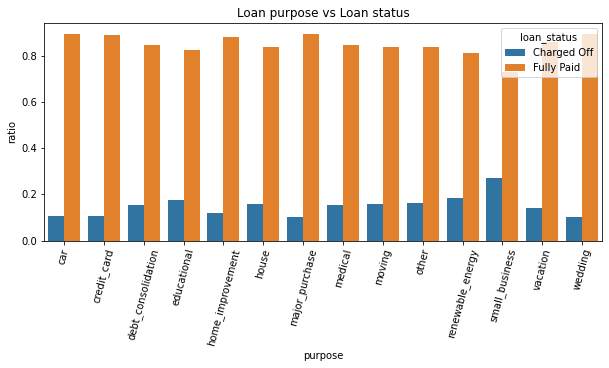

In [262]:
# barplot loan purpose vs loan status ratio
plt.figure(figsize=(10,4))
sns.barplot(x='purpose',y='ratio',hue='loan_status',data=df_purpose)
plt.xticks(rotation=75)
plt.title('Loan purpose vs Loan status')
plt.show()

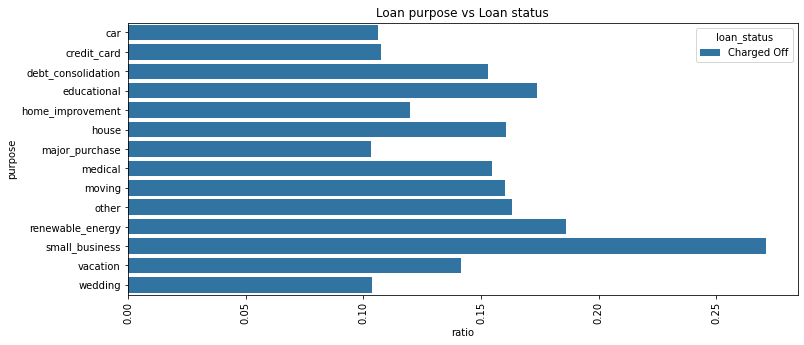

In [263]:
# barplot purpose vs Loan statu
plt.figure(figsize=(12,5))
sns.barplot(y='purpose',x='ratio',hue='loan_status',data=df_purpose[df_purpose.loan_status=='Charged Off'])
plt.xticks(rotation=90)
plt.title('Loan purpose vs Loan status')
plt.show()

### Observations:
- Small business loans are higher prone to default.

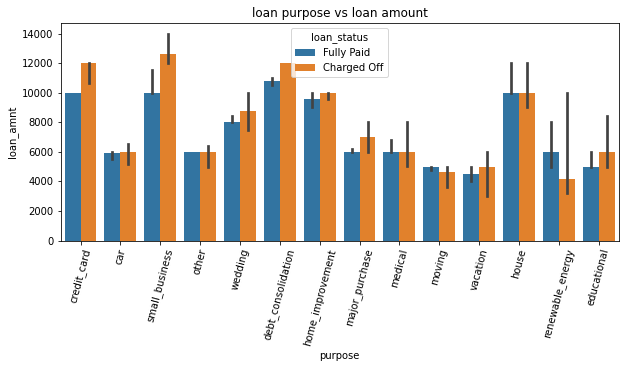

In [264]:
# barplot purpose vs loan amount
plt.figure(figsize=(10,4))
sns.barplot(x='purpose',y='loan_amnt',hue='loan_status',data=loandf,estimator=np.median)
plt.title('loan purpose vs loan amount')
plt.xticks(rotation=75)
plt.show()

### Observations:
- Borrowers took highest amount for small business loan and also they are more prone to default.
- House, debt consolidation, home improvement & credit card also has higher loan amounts and more prone to default. 

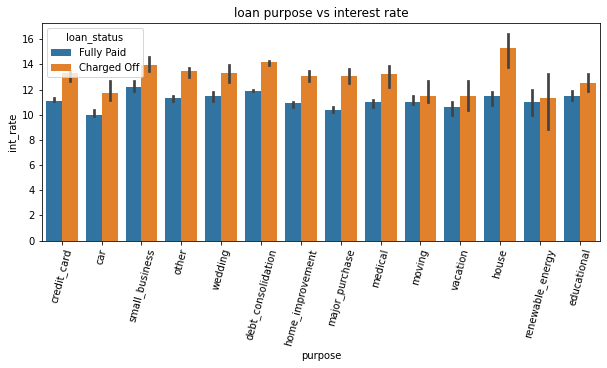

In [265]:
# barplot purpose vs Interest rates
plt.figure(figsize=(10,4))
sns.barplot(x='purpose',y='int_rate',hue='loan_status',data=loandf,estimator=np.median)
plt.title('loan purpose vs interest rate')
plt.xticks(rotation=75)
plt.show()

### Observations:
- There is no strong pattern, However loan for house at high intrest rate is more prone to default as high difference in fully paid and default

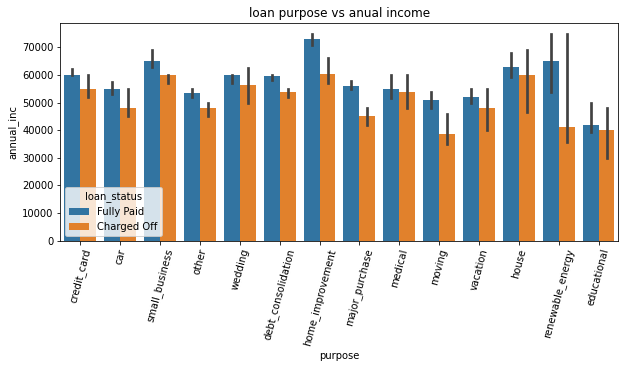

In [266]:
# barplot purpose vs annual income
plt.figure(figsize=(10,4))
sns.barplot(x='purpose',y='annual_inc',hue='loan_status',data=loandf,estimator=np.median)
plt.title('loan purpose vs anual income')
plt.xticks(rotation=75)
plt.show()

### Observations:
- With higher income most of the loan are taken for home improvement,house & small business and also they are the most defaulters.

## Analyzing Loan amount vs Interest rate

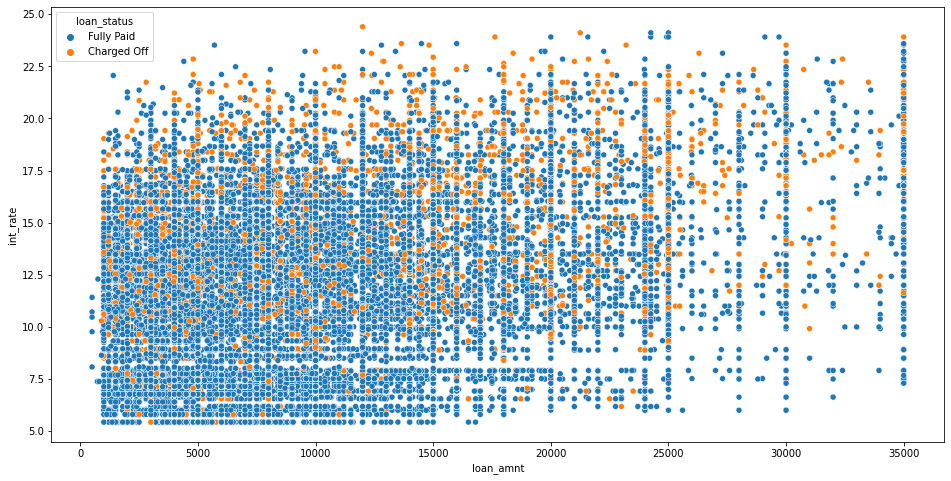

In [267]:
# scatterplot loan amount vs Interest rates
plt.figure(figsize=(16,8))
sns.scatterplot(x='loan_amnt',y='int_rate',data=loandf,hue='loan_status')
plt.show()

### Observations:
- many loans distributes below 15000, However there is no pattern w.r.t interest rate.

## Analyzing Loan amount vs Annual income

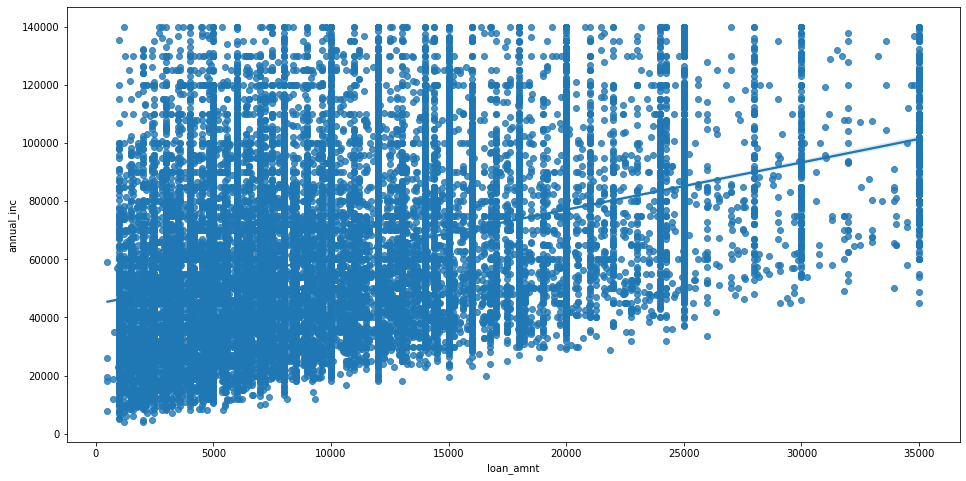

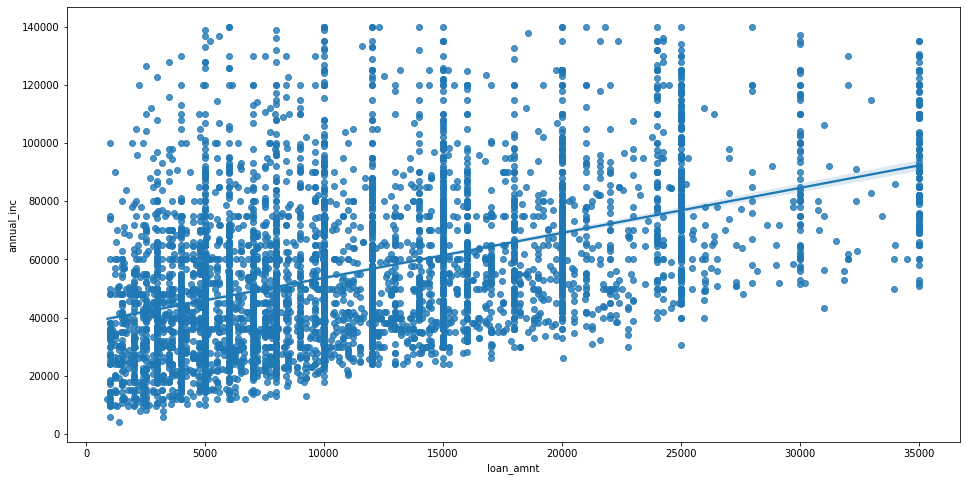

In [268]:
# regplot loan amount vs Annual income
# We will consider outlier treated data for annual income analysis as there is high variation in outlier income with mean income
# outlier treated dataframe : loandf_ol_treated
plt.figure(figsize=(16,8))
sns.regplot(x='loan_amnt',y='annual_inc',data=loandf_ol_treated[loandf_ol_treated.loan_status!='Charged Off'])
#choose regplot to visualize slope
plt.show()

plt.figure(figsize=(16,8))
sns.regplot(x='loan_amnt',y='annual_inc',data=loandf_ol_treated[loandf_ol_treated.loan_status=='Charged Off'])
#choose regplot to visualize slope
plt.show()
# separated graph fro fully paid and default loans, for better pattern understanding

### Observations:
- There is slight positive slope as increasing annual income loan amount increases, However it is not quite strong evidance as major loan distribution is below 15000.

## Analyzing Loan amount vs DTI

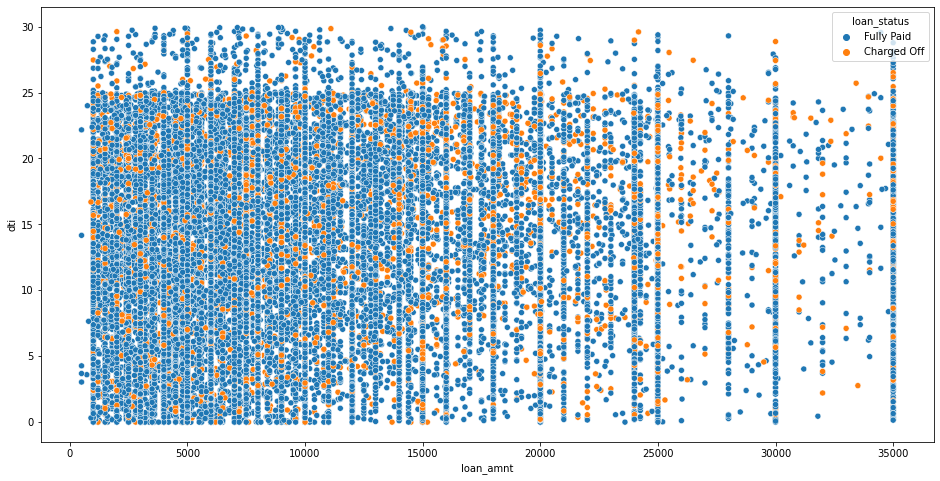

In [269]:
# scatterplot loan amount vs DTI
plt.figure(figsize=(16,8))
sns.scatterplot(x='loan_amnt',y='dti',data=loandf,hue='loan_status')
plt.show()

### Observations:
- No specific pattern noticed.

## Analyzing interest rate vs DTI

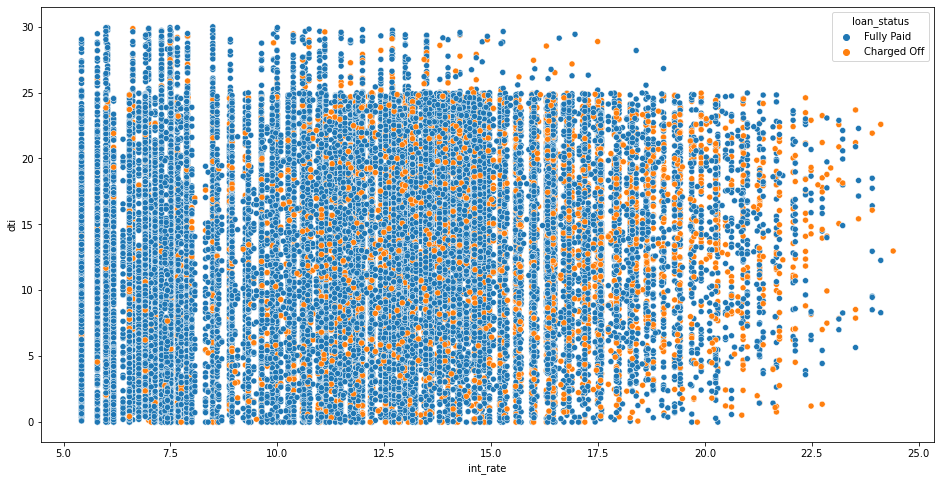

In [270]:
# scatterplot Interest rate vs DTI
plt.figure(figsize=(16,8))
sns.scatterplot(x='int_rate',y='dti',data=loandf,hue='loan_status')
plt.show()

### Observations:
- More charged off is spread around higher interest rates greater than 12.5.

## Analyzing Correlation matrix:

In [271]:
#few columns are not significant for correlation matrix like id, issue_month,issue_year lets remove them
corr_rem_cols=['id','issue_month','issue_year']
loandf_corr = loandf
loandf_corr.drop(corr_rem_cols,axis=1,inplace=True)

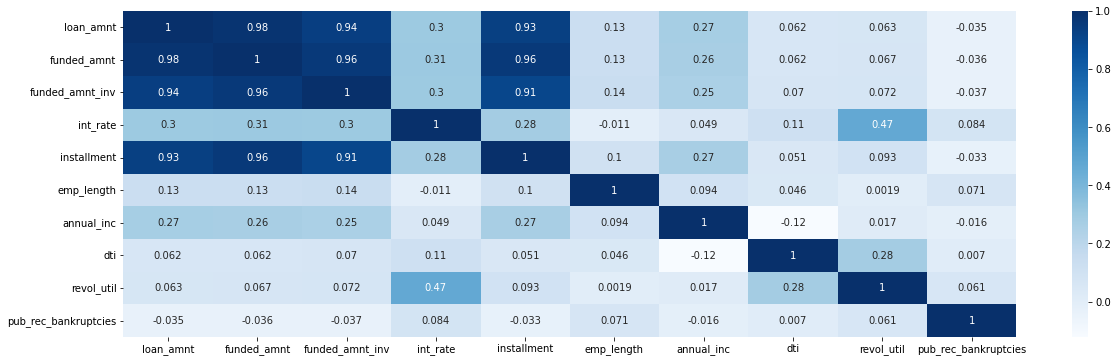

In [272]:
plt.figure(figsize=(20,6))
sns.heatmap(loandf_corr.corr(),annot=True,cmap='Blues')
plt.show()

### Observations:
- revolving credit utilization has moderate correlation with interest rates, as on higher revolving credit utilization borrowers get loan on higher intrest rate.

# 6.Final Analysis observations & conclusion
### There is probability of applicant defaulting loan under below scenarios:

- If interest rate and DTI is higher then loan for tenure 60 months.
- High loan amount approval to Grade E,F & G.They tend to be defaulting with high loan amount greater than 14K.
- Higher loan amount to employee with service length more than 10 years
- Small business and house loan with higher loan amount greater than 14K on high interest rate.
- Applicants whose home ownership is Mortgage and have loan greater than 14K
- Applicant with service length more than 10 years and have loan amount greater than 12K
- When annual income is verified and loan is greater than 14K and interest rate greater than 12%
- When grade is G and interest rate greater than 20%
- Installment above 300 for the tenure of 60 months 